# Time series data science project

- **Chess players patterns discovery and analysis**
- **ariel-zil**

## Part 4 : EDA+classifer based on game board

# 2. Imports

## 2.1 Import packages

In [1]:
#
import seaborn as sb
import os
from warnings import filterwarnings

#
import matplotlib.pyplot as plt
from matplotlib import rcParams

import pandas as pd
import numpy as np
import math

#
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import shap

#
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import  precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split


# Load dataset
import tensorflow as tf

#
import chess
import chess.engine

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
rcParams['figure.figsize'] = 10,6
base_color = sb.color_palette()[0]


filterwarnings("ignore")

2024-04-16 13:22:34.879435: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-16 13:22:34.901621: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 13:22:35.004313: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 13:22:35.004896: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 13:22:35.634136: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

## 2.2 Load enviroment variables

In [2]:
PROJECT_PATH=os.getenv('PROJECT_PATH')
NUMBER_OF_GAMES_MINIMUM=int(os.getenv('NUMBER_OF_GAMES_MINIMUM'))
FICS_MIN_YEAR=int(os.getenv('FICS_MIN_YEAR'))
FICS_MAX_YEAR=int(os.getenv('FICS_MAX_YEAR'))

In [3]:
# Specify the path to the Stockfish binary
STOCKFISH_PATH = '/usr/games/stockfish'

# Initialize the Stockfish engine
engine = chess.engine.SimpleEngine.popen_uci(STOCKFISH_PATH)

## 2.3 Methods

In [4]:
class ExtractMoveFeatures:
    def __init__(self):
        pass

    def extract(self,moves_df):
        moves=self.get_moves(moves_df)

        return {
            "total_moves_white":math.ceil(len(moves)/2),
            "total_moves_black":math.floor(len(moves)/2),
            "moves_before_casting_white":self.count_moves_before_castling(moves,True),
            "moves_before_casting_black":self.count_moves_before_castling(moves,False),
            "count_minor_pieces_defending_center_white":self.count_minor_pieces_defending_center(moves,True),
            "count_minor_pieces_defending_center_black":self.count_minor_pieces_defending_center(moves,False),
            "count_unique_pieces_moved_white":self.count_unique_pieces_moved(moves,True),
            "count_unique_pieces_moved_black":self.count_unique_pieces_moved(moves,False),
            "first_rook_to_seventh_white":self.first_rook_to_seventh(moves,True),
            "first_rook_to_seventh_black":self.first_rook_to_seventh(moves,False),
            "count_white_minor_pieces_center_attack_defense_white":self.count_white_minor_pieces_center_attack_defense(moves,True),
            "count_white_minor_pieces_center_attack_defense_black":self.count_white_minor_pieces_center_attack_defense(moves,False),
            "check_minor_before_major_development_white":self.check_minor_before_major_development(moves,True),
            "check_minor_before_major_development_black":self.check_minor_before_major_development(moves,False),
            "count_knight_edge_moves_white":self.count_knight_edge_moves(moves,True),
            "count_knight_edge_moves_black":self.count_knight_edge_moves(moves,False),
            "count_isolated_pawns_25_white":self.count_isolated_pawns(moves,True,0.25),
            "count_isolated_pawns_50_white":self.count_isolated_pawns(moves,True,0.5),
            "count_isolated_pawns_75_white":self.count_isolated_pawns(moves,True,0.75),
            "count_isolated_pawns_100_white":self.count_isolated_pawns(moves,True,0.1),
            "count_isolated_pawns_25_black":self.count_isolated_pawns(moves,False,0.25),
            "count_isolated_pawns_50_black":self.count_isolated_pawns(moves,False,0.5),
            "count_isolated_pawns_75_black":self.count_isolated_pawns(moves,False,0.75),
            "count_isolated_pawns_100_black":self.count_isolated_pawns(moves,False,0.1),
            "count_double_pawns_25_white":self.count_doubled_pawns(moves,True,0.25),
            "count_double_pawns_50_white":self.count_doubled_pawns(moves,True,0.5),
            "count_double_pawns_75_white":self.count_doubled_pawns(moves,True,0.75),
            "count_double_pawns_100_white":self.count_doubled_pawns(moves,True,0.1),
            "count_double_pawns_25_black":self.count_doubled_pawns(moves,False,0.25),
            "count_double_pawns_50_black":self.count_doubled_pawns(moves,False,0.5),
            "count_double_pawns_75_black":self.count_doubled_pawns(moves,False,0.75),
            "count_double_pawns_100_black":self.count_doubled_pawns(moves,False,0.1),
            "count_triple_pawns_25_white":self.count_triple_pawns(moves,True,0.25),
            "count_triple_pawns_50_white":self.count_triple_pawns(moves,True,0.5),
            "count_triple_pawns_75_white":self.count_triple_pawns(moves,True,0.75),
            "count_triple_pawns_100_white":self.count_triple_pawns(moves,True,0.1),
            "count_triple_pawns_25_black":self.count_triple_pawns(moves,False,0.25),
            "count_triple_pawns_50_black":self.count_triple_pawns(moves,False,0.5),
            "count_triple_pawns_75_black":self.count_triple_pawns(moves,False,0.75),
            "count_triple_pawns_100_black":self.count_triple_pawns(moves,False,0.1),
        }

    def get_moves(self,moves_str):
        moves=moves_str.split("|")
        result=[]

        for m in moves:
            if len(m)==0:
                continue
            if "{" in m:
                m=m[:m.index("{")]
            
            for move_code in [x for x in m.split(" ") if len(x)>0]:
                result.append(move_code)

        return result

    def san_to_Move(self,san_move):
        return chess.Board().parse_san(san_move)

    def extract_board_score_diff(self,moves):
        board = chess.Board()
        score_diff=[]
        for move in moves:
            info_before = engine.analyse(board, chess.engine.Limit(time=0.01))
            board.push_san(move)
            info_after = engine.analyse(board, chess.engine.Limit(time=0.01))
            
            score_before = info_before['score'].relative.score(mate_score=10000)
            score_after = info_after['score'].relative.score(mate_score=10000)
            score_diff.append(score_after-score_before)
        return score_diff


    def count_mistakes(self,score_diff_list,white):
        if white:
            m=0
        else:
            m=1

        return len([score_diff_list[i] for i in range(len(score_diff_list)) if score_diff_list[i]>=100 \
                    and score_diff_list[i]<300 \
                        and i%2 ==m])

    def count_blunders(self,score_diff_list,white):
        if white:
            m=0
        else:
            m=1

        return len([score_diff_list[i] for i in range(len(score_diff_list)) if score_diff_list[i]>=300  and i%2 ==m])

    def first_mistake(self,score_diff_list,white):
        if white:
            for i in range(len(score_diff_list)):
                if score_diff_list[i]>=100 and score_diff_list[i]<=300  and i%2 ==0:
                    return math.floor(i/2) 
            moves_count=len(score_diff_list)
            return math.floor((moves_count-1)/2) 
        else:
            for i in range(len(score_diff_list)):
                if score_diff_list[i]>=100 and score_diff_list[i]<=300 and i%2 ==0:
                    return math.ceil(i/2) 

            moves_count=len(score_diff_list)
            return math.ceil((moves_count-1)/2) 

    def first_blunder(self,score_diff_list,white):
        if white:
            for i in range(len(score_diff_list)):
                if int(score_diff_list[i])>=300  and i%2 ==0:
                    return math.floor(i/2) 
                
            moves_count=len(score_diff_list)
            return math.floor((moves_count-1)/2) 
        else:
            for i in range(len(score_diff_list)):
                if int(score_diff_list[i])>=300  and i%2 ==0:
                    return math.ceil(i/2) 
            moves_count=len(score_diff_list)
            return math.ceil((moves_count-1)/2) 

    def count_moves_before_castling(self,moves,white):
        board = chess.Board()
        move_count = 0
        if white:
            color=chess.WHITE
        else:
            color=chess.BLACK

        for move in moves:
            # Increment move count only on White's moves
            if board.turn == color:
                move_count += 1

            if board.turn != color and board.is_castling(board.parse_san(move)):
                return move_count

            board.push_san(move)

        return move_count


    def count_minor_pieces_defending_center(self,moves,white):
        

        # Get the board after the first 5 moves (10 plies)
        board = chess.Board()
        try:
            for i in range(10):  # Two plies per move
                move=moves[i]
                board.push_san(move)
        except Exception as err:
            return np.nan

        # Define the central squares
        center_squares = [chess.D4, chess.D5, chess.E4, chess.E5]

        # Initialize count of White's knights and bishops defending or attacking the center
        white_minor_piece_count = 0

        # Check pieces attacking or defending the center squares
        for square in center_squares:
            if white:
                attackers = board.attackers(chess.WHITE, square)
            else:
                attackers = board.attackers(chess.BLACK, square)
            for piece_square in attackers:
                piece = board.piece_at(piece_square)
                if piece.piece_type in (chess.KNIGHT, chess.BISHOP):
                    white_minor_piece_count += 1

        return white_minor_piece_count

    def count_unique_pieces_moved(self,moves,white):
        board = chess.Board()

        # To keep track of the unique pieces that have moved
        pieces_moved = set()

        # # Process only the first 10 moves (20 plies)
        # print(moves)
        for i, move in enumerate(moves):
            if i >= 20:
                break

            # After each White move, check the piece moved
            if white:
                cond=(i%2==0)
            else:
                cond=(i%2==1)

            if cond:  # White moves are even indices (0, 2, 4, ...)
                moved_piece = board.piece_at(board.parse_san(move).to_square)
                if moved_piece:
                    # Use the piece type and color to identify unique pieces
                    pieces_moved.add((moved_piece.piece_type, moved_piece.color))
            board.push_san(move)

        # Filter out only White's unique pieces
        white_unique_pieces_count = sum(1 for piece in pieces_moved if piece[1] == chess.WHITE)
        black_unique_pieces_count = sum(1 for piece in pieces_moved if piece[1] == chess.BLACK)
        if white:
            return white_unique_pieces_count
        else:
            return black_unique_pieces_count


    def first_rook_to_seventh(self,moves,white):
        board = chess.Board()

        for i, move in enumerate(moves):
            if white:
                if board.turn == chess.BLACK:  # Check the position after White's move
                    piece = board.piece_at(board.parse_san(move).to_square)
                    if piece and piece.piece_type == chess.ROOK and piece.color == chess.WHITE:
                        if chess.square_rank(board.parse_san(move).to_square) == 6:  # 7th rank for White
                            return i + 1
            else:
                if board.turn == chess.WHITE:  # Check the position after White's move
                    piece = board.piece_at(board.parse_san(move).to_square)
                    if piece and piece.piece_type == chess.ROOK and piece.color == chess.BLACK:
                        if chess.square_rank(board.parse_san(move).to_square) == 6:  # 7th rank for White
                            return i + 1
            board.push_san(move)

        return np.nan  # No such move found

    def count_white_minor_pieces_center_attack_defense(self,moves,white):
        board = chess.Board()
        # Advance the board state by 10 plies to account for the first 5 moves
        for i,move in enumerate(moves):
            if i<10:
                board.push_san(move)


        # Define the central squares of interest
        center_squares = [chess.D4, chess.D5, chess.E4, chess.E5]
        minors_attacking_defending = 0

        # Iterate over center squares and count White knights and bishops attacking or defending them
        if white:
            for square in center_squares:
                attackers_and_defenders = board.attackers(chess.WHITE, square)
                for piece_square in attackers_and_defenders:
                    piece = board.piece_at(piece_square)
                    if piece.piece_type in [chess.KNIGHT, chess.BISHOP]:
                        minors_attacking_defending += 1
        else:
            for square in center_squares:
                attackers_and_defenders = board.attackers(chess.BLACK, square)
                for piece_square in attackers_and_defenders:
                    piece = board.piece_at(piece_square)
                    if piece.piece_type in [chess.KNIGHT, chess.BISHOP]:
                        minors_attacking_defending += 1

        return minors_attacking_defending

    def check_minor_before_major_development(self,moves,white):
        board = chess.Board()
        minor_developed = set()
        major_moved = False
        if white:
            color=chess.WHITE
        else:
            color=chess.BLACK

        for move in moves:
            square=board.parse_san(move).to_square
            board.push_san(move)
            piece = board.piece_at(square)

            if piece.color == color:
                if piece.piece_type in [chess.KNIGHT, chess.BISHOP]:
                    minor_developed.add((piece.piece_type, square))
                elif piece.piece_type in [chess.QUEEN, chess.ROOK]:
                    major_moved = True
                    break  # Stop checking once a major piece has moved

        return not major_moved and len(minor_developed) > 0

    def get_edge_squares(self):
        edge_squares = set()
        # Add squares from the 1st and 8th ranks
        for file in range(8):  # Files are from 0 to 7
            edge_squares.add(chess.square(file, 0))  # 1st rank
            edge_squares.add(chess.square(file, 7))  # 8th rank

        # Add squares from the 'a' and 'h' files
        for rank in range(8):  # Ranks are from 0 to 7
            edge_squares.add(chess.square(0, rank))  # 'a' file
            edge_squares.add(chess.square(7, rank))  # 'h' file

        return edge_squares

    def move_knight_edge_moves(self,moves,white):
        board = chess.Board()
        edge_squares =self.get_edge_squares()

        if white:
            color=chess.BLACK
        else:
            color=chess.WHITE

        for i,move in enumerate(moves):
            square=board.parse_san(move).to_square
            board.push_san(move)


            if board.turn == color:  # After White has moved
                if board.piece_at(square) and board.piece_at(square).piece_type == chess.KNIGHT:
                    if square in edge_squares and board.piece_at(square).color == chess.WHITE:
                        return i

        return np.nan

    def count_knight_edge_moves(self,moves,white):
        board = chess.Board()
        edge_squares =self.get_edge_squares()

        knight_edge_moves = 0
        if white:
            color=chess.BLACK
        else:
            color=chess.WHITE

        for move in moves:
            square=board.parse_san(move).to_square
            board.push_san(move)


            if board.turn == color:  # After White has moved
                if board.piece_at(square) and board.piece_at(square).piece_type == chess.KNIGHT:
                    if square in edge_squares and board.piece_at(square).color == chess.WHITE:
                        knight_edge_moves += 1

        return knight_edge_moves

    def count_isolated_pawns_helper(self,board,color):
        isolated_pawns = 0
        for square in chess.SQUARES:
            piece = board.piece_at(square)
            if piece and piece.color ==color  and piece.piece_type == chess.PAWN:
                file = chess.square_file(square)
                is_isolated = True
                # Check neighboring files
                for neighbor_file in [file - 1, file + 1]:
                    if neighbor_file < 0 or neighbor_file > 7:
                        continue
                    if any(board.piece_at(chess.square(neighbor_file, rank)) and
                        board.piece_at(chess.square(neighbor_file, rank)).piece_type == chess.PAWN
                        for rank in range(8)):
                        is_isolated = False
                        break
                if is_isolated:
                    isolated_pawns += 1
        return isolated_pawns

    def count_isolated_pawns(self,moves,white,percentage):
        board = chess.Board()
        total_moves = len(moves)
        isolated_counts = []

        for move_number, move in enumerate(moves):
            board.push_san(move)
            if move_number ==int(total_moves * percentage):
                if white:
                    isolated_counts.append((move_number,self. count_isolated_pawns_helper(board,chess.WHITE)))
                else:
                    isolated_counts.append((move_number, self.count_isolated_pawns_helper(board,chess.BLACK)))

        return isolated_counts[0][1]


    def count_doubled_pawns(self,moves,white,percentage):
        board = chess.Board()
        total_moves = len(moves)
        doubled_pawn_counts = []

        for move_number, move in enumerate(moves):
            board.push_san(move)
            if move_number ==int(total_moves * percentage):
                if white:
                    doubled_pawn_counts.append((move_number, self.count_doubled_white_helper(board,chess.WHITE)))
                else:
                    doubled_pawn_counts.append((move_number, self.count_doubled_white_helper(board,chess.BLACK)))
        return doubled_pawn_counts[0][1]

    def count_doubled_white_helper(self,board,color):
        file_pawn_count = [0] * 8  # There are 8 files, indexed 0 to 7
        doubled_pawns = 0

        # Count pawns on each file
        for square in chess.SQUARES:
            piece = board.piece_at(square)
            if piece and piece.color == color and piece.piece_type == chess.PAWN:
                file = chess.square_file(square)
                file_pawn_count[file] += 1

        # Count files with more than one pawn
        for count in file_pawn_count:
            if count > 1:
                doubled_pawns += (count - 1)  # Add the number of pawns above the first for doubling

        return doubled_pawns


    def count_triple_pawns(self,moves,white,percentage):
        board = chess.Board()
        total_moves = len(moves)
        tripled_pawn_counts = []

        for move_number, move in enumerate(moves):
            board.push_san(move)
            if move_number ==int(total_moves * percentage):
                if white:
                    tripled_pawn_counts.append((move_number, self.count_tripled_white_helper(board,chess.WHITE)))
                else:
                    tripled_pawn_counts.append((move_number, self.count_tripled_white_helper(board,chess.BLACK)))
        return tripled_pawn_counts[0][1]

    def count_tripled_white_helper(self,board,color):
        file_pawn_count = [0] * 8  # There are 8 files, indexed 0 to 7
        tripled_pawns = 0

        # Count pawns on each file
        for square in chess.SQUARES:
            piece = board.piece_at(square)
            if piece and piece.color == color and piece.piece_type == chess.PAWN:
                file = chess.square_file(square)
                file_pawn_count[file] += 1

        # Count files with more than one pawn
        for count in file_pawn_count:
            if count > 2:
                tripled_pawns += (count - 1)  # Add the number of pawns above the first for doubling

        return tripled_pawns


In [5]:

filterwarnings("ignore")


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
rcParams['figure.figsize'] = 10,6
base_color = sb.color_palette()[0]


filterwarnings("ignore")

def classify(df,test_size,model,name):
    train, test = train_test_split(df, test_size=test_size)
    y_train, y_test = train['Label'], test['Label']
    X_train, X_test = train.drop('Label', axis=1), test.drop('Label', axis=1)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print("Model name:",name)
    print("accuracy_score:",accuracy_score(y_test,y_predict))
    print("roc_auc_score:",roc_auc_score(y_test,y_predict))
    print("precision_score:",precision_score(y_test,y_predict))
    print("f1_score:",f1_score(y_test,y_predict))
    display( RocCurveDisplay.from_estimator(model, X_test, y_test))
    plt.show()
    try:
        explainer = shap.Explainer(model)
        shap_values = explainer.shap_values(X_test)
        shap.summary_plot(shap_values, X_test)
    except Exception as err:
        pass
    return {
        'model':model,
        'accuracy':accuracy_score(y_test,y_predict),
        'precision':precision_score(y_test,y_predict),
        'recall':recall_score(y_test,y_predict),
        'f1':f1_score(y_test,y_predict),
        'name':name
           }

def rfe(df,test_size,n_features_to_select,model,name):
    train, test = train_test_split(df, test_size=test_size)
    y_train, y_test = train['Label'], test['Label']
    X_train, X_test = train.drop('Label', axis=1), test.drop('Label', axis=1)
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select, step=1)  # Adjust n_features_to_select as needed
    # Fit RFE
    rfe.fit(X_train, y_train)

    # Boolean mask of selected features
    selected_features = rfe.support_

    # Ranking of features, where 1 means selected
    feature_ranking = rfe.ranking_

    print("Model name:",name)
    print("selected_features:",selected_features)
    print("feature_ranking:",feature_ranking)
    return {
        'model':model,
        'selected_features':selected_features,
        'feature_ranking':feature_ranking,
        'name':name
           }

In [94]:
def create_sum(player,df1,df2,df3):
    result={
        "Player":[player]
    }
    for c in df1.columns:
       result[c+"_mean1"]=[ np.mean(df1[c])]
       result[c+"_mean2"]=[ np.mean(df2[c])]
       result[c+"_mean3"]=[ np.mean(df3[c])]
    return pd.DataFrame.from_dict(result)



In [7]:
def compare_model_results(results):

    a, p, r, f,names = [], [], [], [],[]
    for res in results:
        a.append(res["accuracy"])
        p.append(res["precision"])
        r.append(res["recall"])
        f.append(res["f1"])
        names.append(res["name"])
    #
    model_score = pd.DataFrame([a,p,r,f],
                 columns = names).T.sort_values(by=3, ascending=False).rename(columns={0:'Accuracy', 1: 'Precision', 2: 'Recall', 3: 'F1',}).round(4) 
    print(model_score)


In [8]:
def get_models():
   return [
    {"name":"decision tree","model":DecisionTreeClassifier(random_state=42)},
    {"name":"Gaussian Naive Bayes","model":GaussianNB()},
    {"name":"KNeighborsClassifier","model":KNeighborsClassifier(2)},
    {"name":"AdaBoostClassifier","model":AdaBoostClassifier()},
    {"name":"CatBoostClassifier","model":CatBoostClassifier()},
    {"name":"XGBClassifier","model":XGBClassifier()},
    {"name":"LGBMClassifier","model":LGBMClassifier()},
    {"name":"logistic regression","model":LogisticRegression()},
    {"name":"Support vector machine","model":SVC(probability =True)},
    {"name":"basic random forrest","model":RandomForestClassifier(n_estimators=100, random_state=42)}
    ]

In [104]:
def transform_data(df,players):

    white_groups=df.groupby("White")
    black_groups=df.groupby("Black")
    groups={
    }

    def parse_result(is_white,res):
        if is_white:
            if "1/2" in res:
                return 1/2
            if "1-0" in res:
                return 1
            return 0
        else:
            if "1/2" in res:
                return 1/2
            if "1-0" in res:
                return 0
            return 1

    #
    for player in players:
        try:
            white_player_df=white_groups.get_group(player).drop(columns=["Move","BlackIsComp","White","WhiteElo","Time","WhiteClock","BlackElo","BlackClock","Year","WhiteIsComp","BlackIsComp","ECO"])
            white_player_df=white_player_df[[c for c in white_player_df.columns if "black" not in c and "Black" not in c]]
            white_player_df=white_player_df.rename(columns={k:k.replace("_white","") for k in white_player_df.columns if "_white" in k })
            white_player_df["Result"]=white_player_df["Result"].apply(lambda s:parse_result(True,s))

        except Exception as err:
            white_player_df=None
        try:

            black_player_df=black_groups.get_group(player).drop(columns=["BlackIsComp","Move","Black","WhiteElo","Time","WhiteClock","BlackClock","BlackElo","Year","WhiteIsComp","ECO"])
            black_player_df=black_player_df[[c for c in black_player_df.columns if "White" not in c and "white" not in c]]
            black_player_df=black_player_df.rename(columns={k:k.replace("_black","") for k in black_player_df.columns if "_black" in k })
            black_player_df["Result"]=black_player_df["Result"].apply(lambda s:parse_result(False,s))
        except Exception as err:
                black_player_df=None

        if white_player_df is not None and black_player_df is not None:
            groups[player]=pd.concat([white_player_df,black_player_df]).fillna(0)
        elif white_player_df is None and black_player_df is not None:
            groups[player]=black_player_df.fillna(0)  
        elif black_player_df is None and white_player_df is not None:
            groups[player]=white_player_df.fillna(0)  
    return groups        

In [105]:
def transform_data_for_timeseries_board_features(groups,df_interval,year=2018):
    date_1=pd.to_datetime([f'{year}-03-01 00:00:00']).min()
    date_2=pd.to_datetime([f'{year}-06-01 00:00:00']).min()
    date_3=pd.to_datetime([f'{year}-09-01 00:00:00']).min()

    p1_players={}
    p2_players={}
    p3_players={}
    for k,v in groups.items():

        games_date_mapping=v[["FICSGamesDBGameNo","Date"]]
        p1=list(games_date_mapping[pd.to_datetime(games_date_mapping["Date"])<=date_1]["FICSGamesDBGameNo"])
        p2=list(games_date_mapping[(pd.to_datetime(games_date_mapping["Date"])<=date_2)&(pd.to_datetime(games_date_mapping["Date"])>date_1)]["FICSGamesDBGameNo"])
        p3=list(games_date_mapping[(pd.to_datetime(games_date_mapping["Date"])<=date_3)&(pd.to_datetime(games_date_mapping["Date"])>date_2)]["FICSGamesDBGameNo"])
        p1_players[k]=v[v["FICSGamesDBGameNo"].isin(p1)]
        p2_players[k]=v[v["FICSGamesDBGameNo"].isin(p2)]
        p3_players[k]=v[v["FICSGamesDBGameNo"].isin(p3)]

    frames=[]
    to_drop=['FICSGamesDBGameNo','check_minor_before_major_development','Date']

    for k in p1_players.keys():
        frames.append(create_sum(k, p1_players[k].drop(columns=to_drop), p2_players[k].drop(columns=to_drop), p3_players[k].drop(columns=to_drop)
        )),

    players_moves_features_df=pd.concat(frames)
    players_moves_features_df=players_moves_features_df.dropna()
    players_moves_features_df=players_moves_features_df.merge(df_interval,on='Player')
    players_moves_features_df=players_moves_features_df.drop(columns=[c for c in players_moves_features_df.columns if "Unnamed" in c])
    return players_moves_features_df

## 3 Moves PreProccessing
In this section we evaluate chess moves


### 3.1 Analyze moves

In [ ]:
df=pd.read_csv(f"{PROJECT_PATH}/data/fics/interim/chess-games-clean-blitz-rated-vfinal-details.csv")
df["Year"]=df.Date.apply(lambda r:r.split(".")[0])
df=df[df["Year"]=="2018"]
df=df[["FICSGamesDBGameNo","Move"]]
df.to_csv(f"{PROJECT_PATH}/data/fics/interim/chess-games-moves-only-clean-2018.csv")
del df

In [ ]:
game_features_df=pd.read_csv(f"{PROJECT_PATH}/data/fics/interim/chess-games-moves-only-clean-2018-features.csv")
game_features_df

lets see how much data needed to run

In [ ]:
total=0
chunksize=10000

for  sample in pd.read_csv(f"{PROJECT_PATH}/data/fics/interim/chess-games-moves-only-clean-2018.csv",chunksize=chunksize):
    total=total+chunksize
total

lets analyze board games and save the results

In [ ]:
i=0
chunksize=10000
def to_df(my_d):
    fixed_d={k:[v] for k,v in my_d.items()}
    return pd.DataFrame.from_dict(fixed_d)

for  sample in pd.read_csv(f"{PROJECT_PATH}/data/fics/interim/chess-games-moves-only-clean-2018.csv",chunksize=chunksize):
    print((i/total)*100)
    i=i+chunksize   
    sample_dict={k:v for  k,v in zip(list(sample["FICSGamesDBGameNo"]),list(sample["Move"]))}
    ids=[id for id in sample_dict.keys() if   len(game_features_df[game_features_df["FICSGamesDBGameNo"]==id])==0]
    
    for id  in tqdm(ids):
        v=ExtractMoveFeatures().extract(sample_dict[id])
        v["FICSGamesDBGameNo"]=id
        game_features_df=pd.concat([game_features_df,to_df(v)])

game_features_df.to_csv(f"{PROJECT_PATH}/data/fics/interim/chess-games-moves-only-clean-2018-features.csv")


### 3.2 proccess raw move features

In [18]:
game_features_df=pd.read_csv(f"{PROJECT_PATH}/data/fics/interim/chess-games-moves-only-clean-2018-features.csv")
game_features_df=game_features_df.drop(columns=[c for c in game_features_df.columns if "Unnamed" in c])
game_features_df

,FICSGamesDBGameNo,total_moves_white,total_moves_black,moves_before_casting_white,moves_before_casting_black,count_minor_pieces_defending_center_white,count_minor_pieces_defending_center_black,count_unique_pieces_moved_white,count_unique_pieces_moved_black,first_rook_to_seventh_white,...,count_double_pawns_75_black,count_double_pawns_100_black,count_triple_pawns_25_white,count_triple_pawns_50_white,count_triple_pawns_75_white,count_triple_pawns_100_white,count_triple_pawns_25_black,count_triple_pawns_50_black,count_triple_pawns_75_black,count_triple_pawns_100_black
0,455492835,12,11,12,11,0.0,2.0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,450877124,19,18,19,18,2.0,2.0,0,0,NaN,...,1,0,0,0,0,0,0,0,0,0
2,450869119,18,17,6,12,2.0,2.0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,450866229,50,49,7,9,0.0,2.0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,450866210,21,20,6,6,4.0,3.0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899995,436744065,36,36,8,5,3.0,2.0,0,0,NaN,...,1,0,0,0,0,0,0,0,0,0
1899996,436744064,35,35,15,5,4.0,2.0,0,0,58.0,...,1,0,0,0,0,0,0,0,0,0
1899997,436744063,23,23,6,6,1.0,4.0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
1899998,436744062,39,38,13,13,4.0,4.0,0,0,70.0,...,0,0,0,0,0,0,0,0,0,0


merge with raw detail from games

In [28]:
frames=[]

for sample in pd.read_csv(f"{PROJECT_PATH}/data/fics/proccessed/chess-games.csv",chunksize=100000):
    sample["Year"]=sample["Date"].apply(lambda s:int(s.split(".")[0]))
    sample=sample[sample["Year"]==2018]
    sample=sample[sample["FICSGamesDBGameNo"].isin(game_features_df["FICSGamesDBGameNo"])].sort_values(by="FICSGamesDBGameNo")
    frames.append(sample)

df_2018=pd.concat(frames)

df_2018=df_2018.drop(columns=[c for c in df_2018.columns if "Unnamed" in c])
df_2018=df_2018.merge(game_features_df,on='FICSGamesDBGameNo').drop(columns=["Site","Event","WhiteRD","BlackRD","TimeControl"])
df_2018

,FICSGamesDBGameNo,White,Black,WhiteElo,BlackElo,Date,Time,WhiteClock,BlackClock,ECO,...,count_double_pawns_75_black,count_double_pawns_100_black,count_triple_pawns_25_white,count_triple_pawns_50_white,count_triple_pawns_75_white,count_triple_pawns_100_white,count_triple_pawns_25_black,count_triple_pawns_50_black,count_triple_pawns_75_black,count_triple_pawns_100_black
0,450101559,ILVEROPAOLONE,maienberger,1673,1633,2018.11.15,08:12:00,0:03:00.000,0:03:00.000,C40,...,0,0,0,0,0,0,0,0,0,0
1,450102569,drjineshm,shineyday,1502,1542,2018.12.28,00:39:00,0:03:00.000,0:03:00.000,C40,...,0,0,0,0,0,0,0,0,0,0
2,450107194,lebber,HAAG,1783,1662,2018.12.26,13:27:00,0:04:00.000,0:04:00.000,B07,...,1,0,0,0,0,0,0,0,0,0
3,450109399,ramparashar,SchakenSchaken,1684,1769,2018.12.09,09:42:00,0:03:00.000,0:03:00.000,B12,...,0,1,0,0,0,0,0,0,0,0
4,450866210,DixierRebel,WASFOX,1542,1542,2018.11.10,15:59:00,0:03:00.000,0:03:00.000,A00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899995,437464536,rantelg,whiterose,1393,1388,2018.12.20,12:54:00,0:03:00.000,0:03:00.000,C45,...,0,0,0,0,0,0,0,0,0,0
1899996,437464537,DieterHaubold,GringoEngine,1623,1736,2018.12.20,12:59:00,0:03:00.000,0:03:00.000,B02,...,1,0,0,0,0,0,0,0,0,0
1899997,437464538,RMV,EagleWingz,1326,1305,2018.12.20,12:53:00,0:03:00.000,0:03:00.000,D31,...,0,0,0,0,0,0,0,0,0,0
1899998,437464539,chessmanjeff,takolako,1489,1428,2018.12.20,12:55:00,0:05:00.000,0:05:00.000,C54,...,0,0,0,0,0,0,0,0,0,0


load players labels from previous section

In [67]:
df_interval=pd.read_csv(f"{PROJECT_PATH}/data/fics/interim/player_labels.csv")
df_interval=df_interval.rename(columns={"Unnamed: 0":"Player"}).drop(columns=["0","1","2","3"])
df_interval

,Player,Label
0,ABCi,0
1,ABSBEGINNER,0
2,ADJUSTOR,1
3,AFCERGY,1
4,AFRF,0
...,...,...
5994,zwartspeler,0
5995,zwirek,1
5996,zxtxf,1
5997,zyrq,0


prepare the dataframe by players

In [106]:
groups=transform_data(df_2018,list(df_interval["Player"]))
(groups['ABCi']).head()

,FICSGamesDBGameNo,Date,PlyCount,Result,total_moves,moves_before_casting,count_minor_pieces_defending_center,count_unique_pieces_moved,first_rook_to_seventh,count_minor_pieces_center_attack_defense,...,count_isolated_pawns_75,count_isolated_pawns_100,count_double_pawns_25,count_double_pawns_50,count_double_pawns_75,count_double_pawns_100,count_triple_pawns_25,count_triple_pawns_50,count_triple_pawns_75,count_triple_pawns_100
271150,437607677,2018.12.27,69,1.0,35,6,4.0,0,68.0,4,...,0,0,0,0,0,0,0,0,0,0
489752,430527259,2018.01.22,132,0.5,66,6,3.0,0,94.0,3,...,0,0,0,0,0,0,0,0,0,0
606573,431231168,2018.02.20,49,0.0,25,6,2.0,0,0.0,2,...,1,0,0,0,0,0,0,0,0,0


transform the data into features for time series by player

In [107]:
players_moves_features_df=transform_data_for_timeseries_board_features(groups,df_interval,2018)
players_moves_features_df.head()
players_moves_features_df.to_csv(f"{PROJECT_PATH}/data/fics/interim/chess-games-moves-only-clean-2018-features-parsed.csv")

## 4 Classifier

### 4.1 run models

-------------------------------------------------- decision tree --------------------------------------------------
Model name: decision tree
accuracy_score: 0.5377733598409543
roc_auc_score: 0.5157569708689415
precision_score: 0.4075
f1_score: 0.41213653603034134


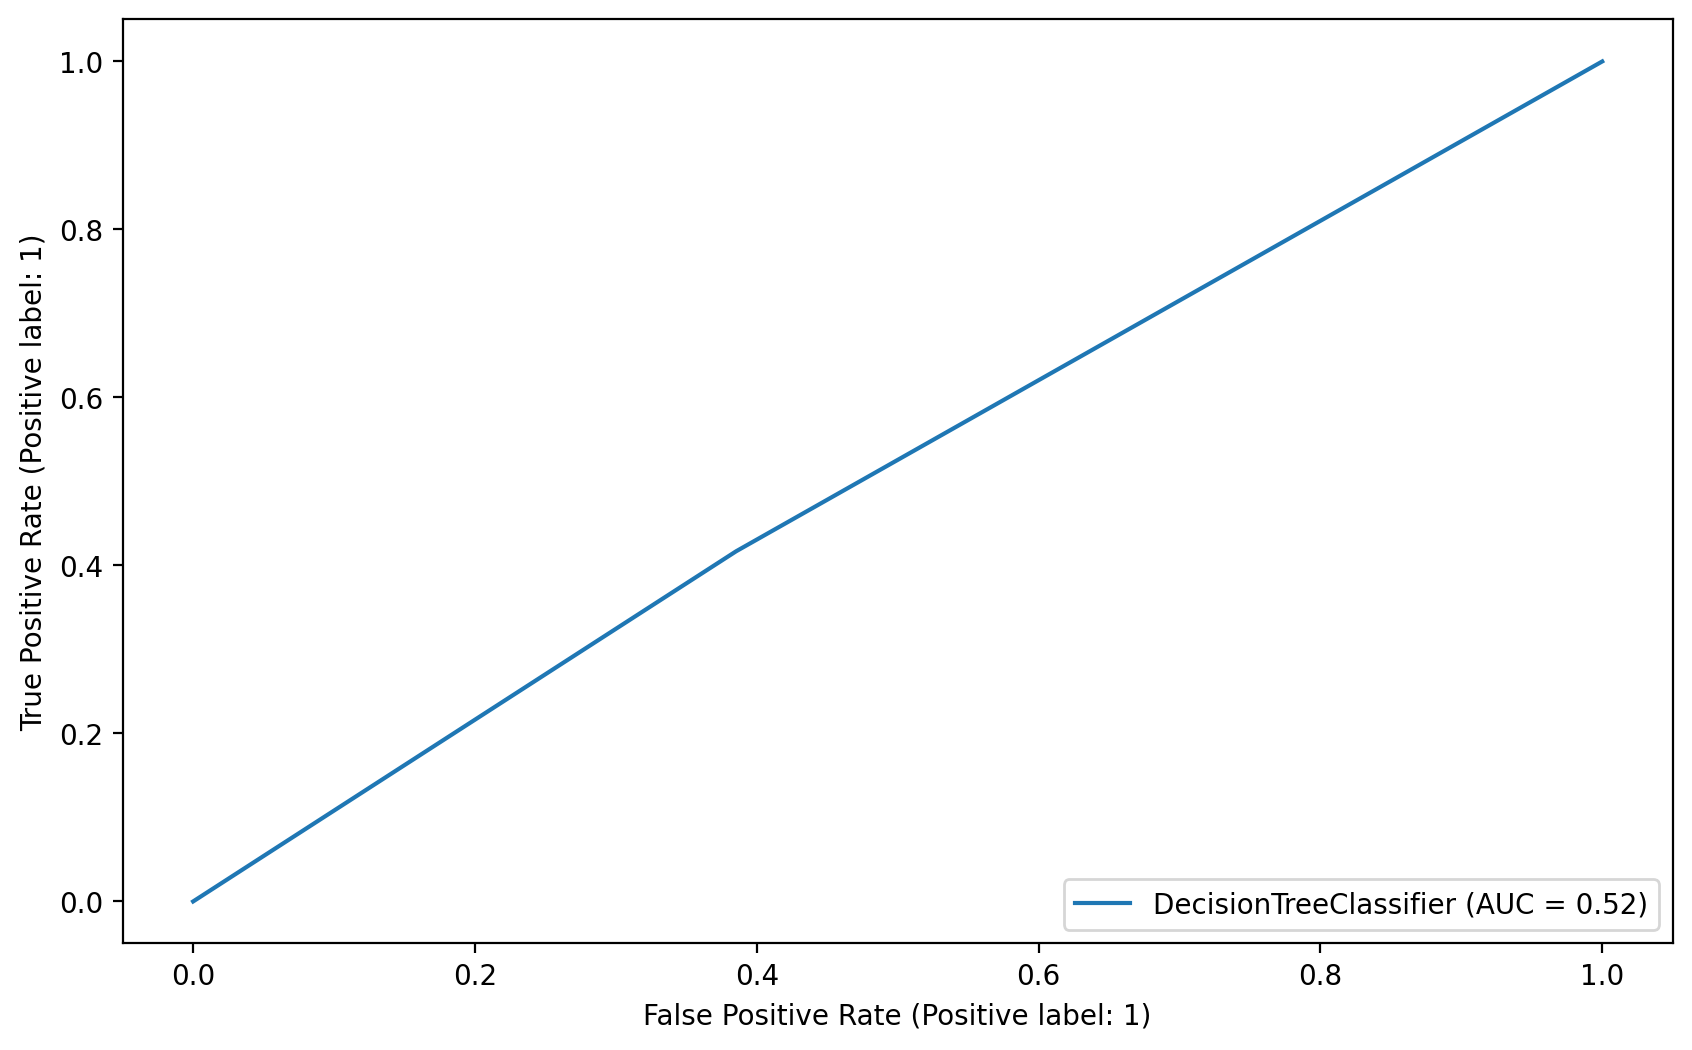

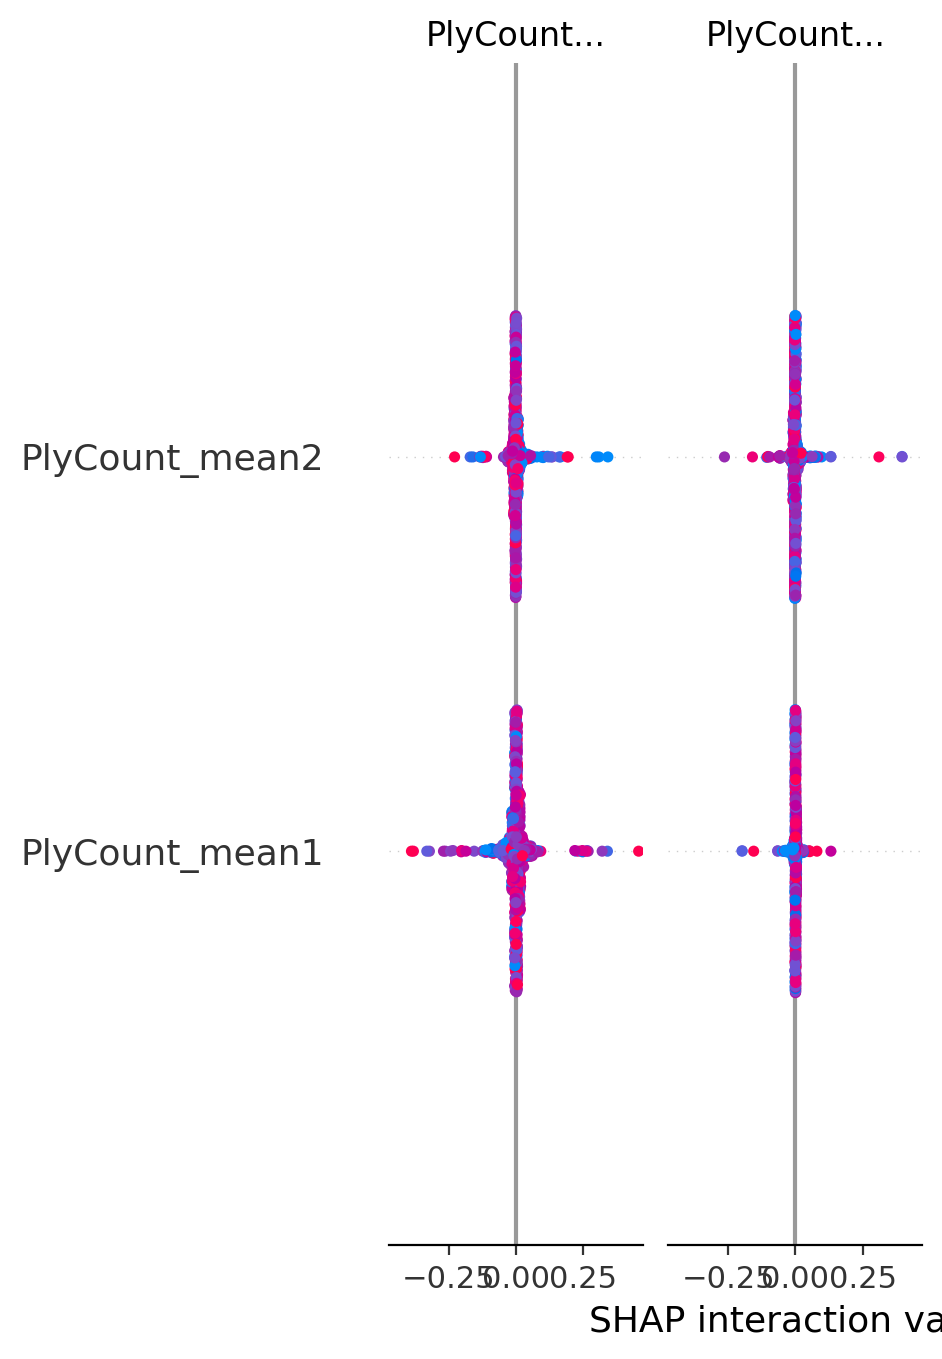

-------------------------------------------------- Gaussian Naive Bayes --------------------------------------------------
Model name: Gaussian Naive Bayes
accuracy_score: 0.5656063618290258
roc_auc_score: 0.5180806216529792
precision_score: 0.4291044776119403
f1_score: 0.3448275862068966


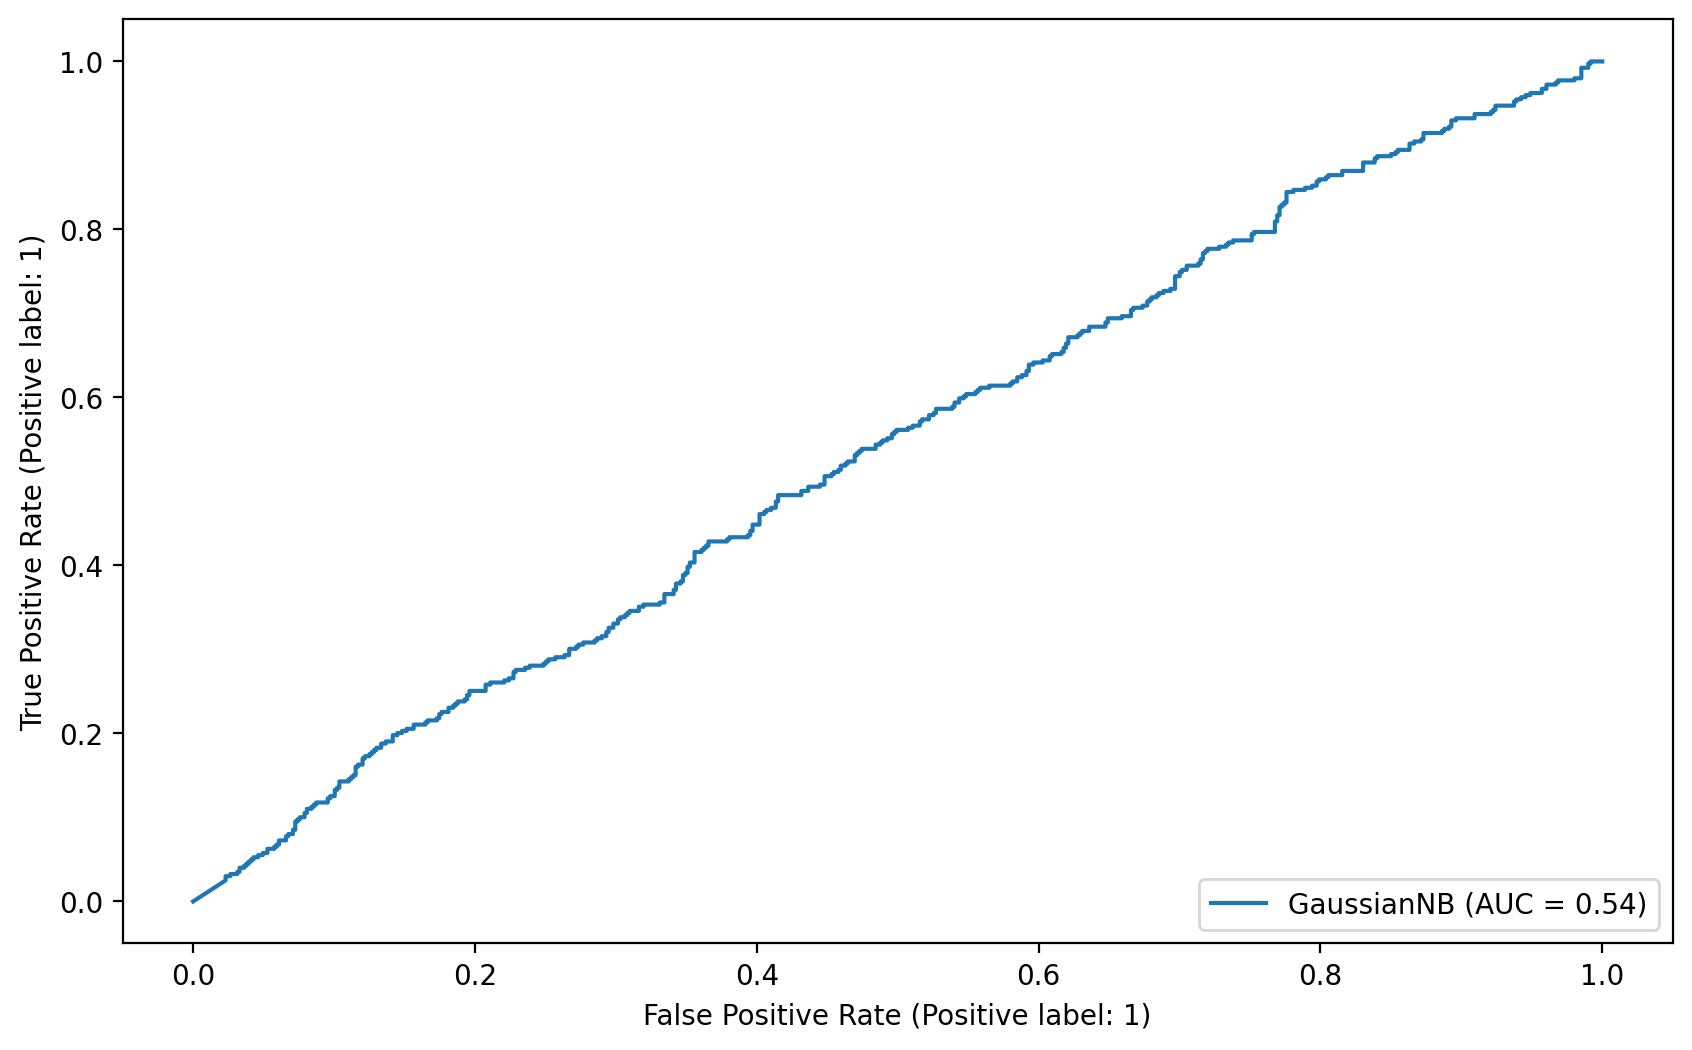

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe049d4a700>
Traceback (most recent call last):
  File "/home/ariel/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ariel/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ariel/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/ariel/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribut

-------------------------------------------------- KNeighborsClassifier --------------------------------------------------


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fdf882f13a0>
Traceback (most recent call last):
  File "/home/ariel/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ariel/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ariel/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/ariel/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribut

Model name: KNeighborsClassifier
accuracy_score: 0.5874751491053678
roc_auc_score: 0.507901554404145
precision_score: 0.40764331210191085
f1_score: 0.23572744014732963


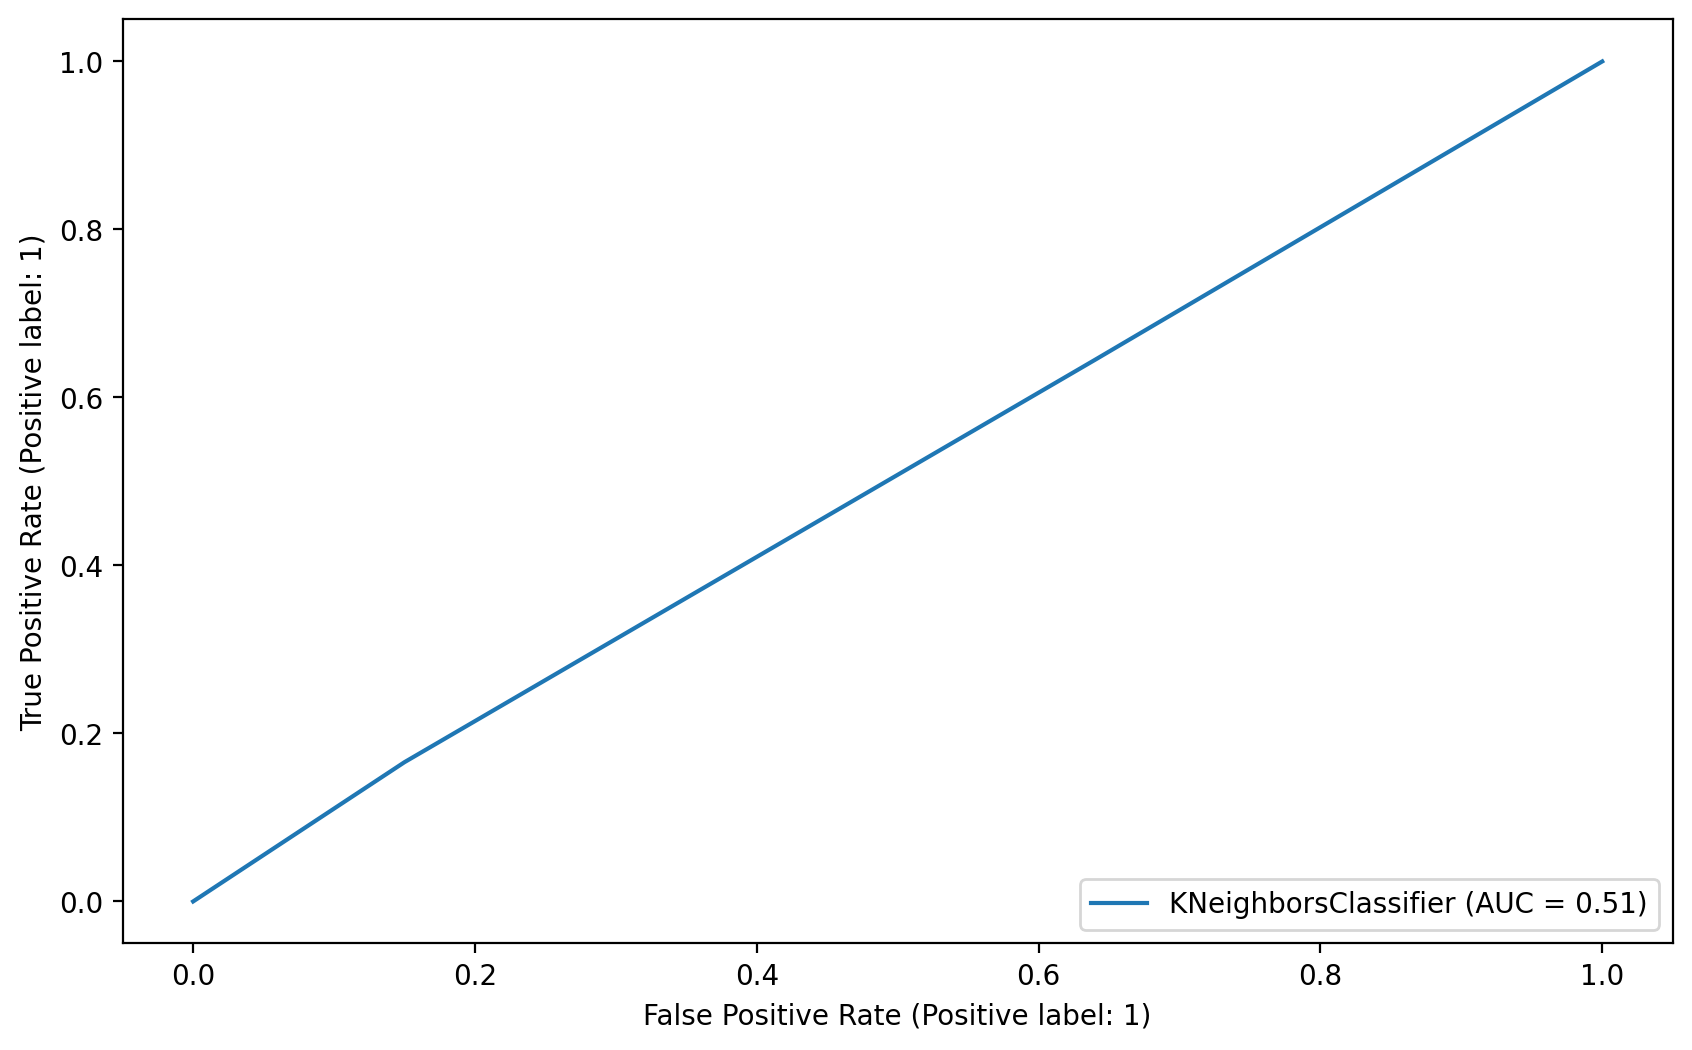

-------------------------------------------------- AdaBoostClassifier --------------------------------------------------
Model name: AdaBoostClassifier
accuracy_score: 0.5934393638170974
roc_auc_score: 0.5184351152974445
precision_score: 0.44375
f1_score: 0.25771324863883843


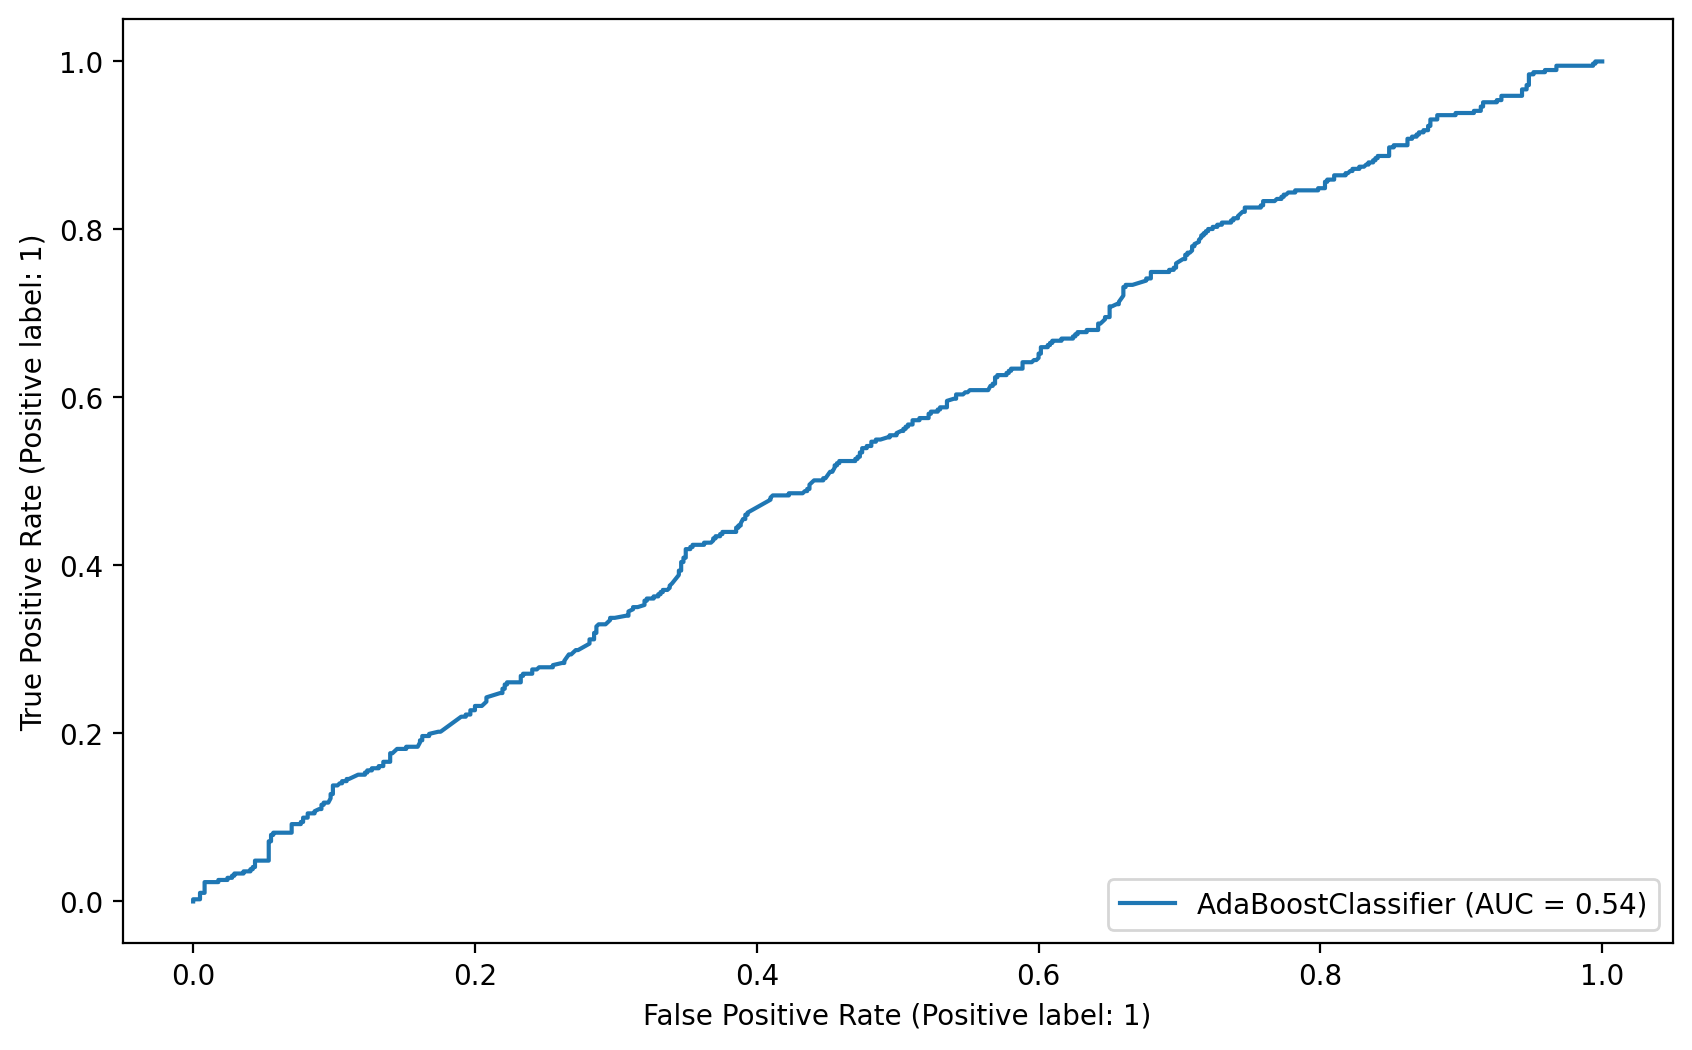

-------------------------------------------------- CatBoostClassifier --------------------------------------------------
Learning rate set to 0.018669
0:	learn: 0.6919532	total: 1.89ms	remaining: 1.89s
1:	learn: 0.6909609	total: 3.2ms	remaining: 1.6s
2:	learn: 0.6899589	total: 4.64ms	remaining: 1.54s
3:	learn: 0.6889713	total: 6.04ms	remaining: 1.5s
4:	learn: 0.6879106	total: 7.47ms	remaining: 1.49s
5:	learn: 0.6869879	total: 8.97ms	remaining: 1.49s
6:	learn: 0.6860384	total: 10.8ms	remaining: 1.53s
7:	learn: 0.6850421	total: 12.4ms	remaining: 1.54s
8:	learn: 0.6842404	total: 14ms	remaining: 1.55s
9:	learn: 0.6833326	total: 15.8ms	remaining: 1.56s
10:	learn: 0.6825221	total: 17.4ms	remaining: 1.57s
11:	learn: 0.6815093	total: 19ms	remaining: 1.56s
12:	learn: 0.6806935	total: 20.8ms	remaining: 1.58s
13:	learn: 0.6799008	total: 22.5ms	remaining: 1.59s
14:	learn: 0.6791444	total: 24.2ms	remaining: 1.59s
15:	learn: 0.6782692	total: 25.8ms	remaining: 1.59s
16:	learn: 0.6776449	total: 27.5ms

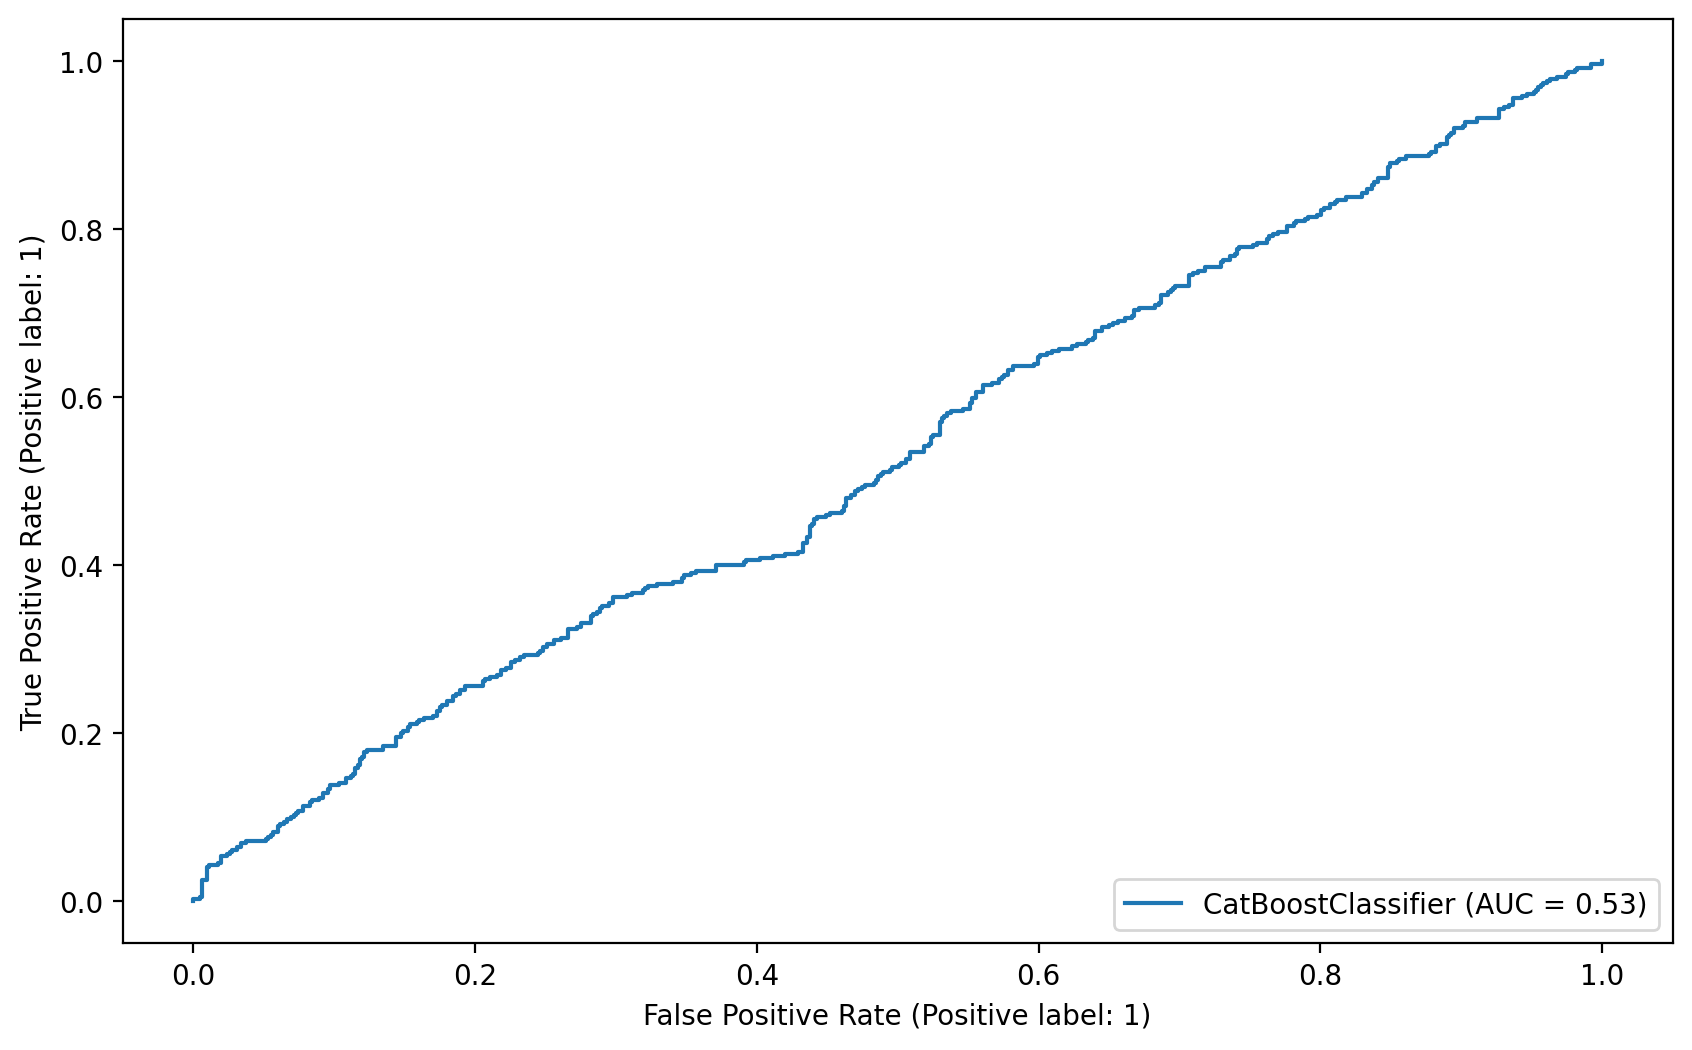

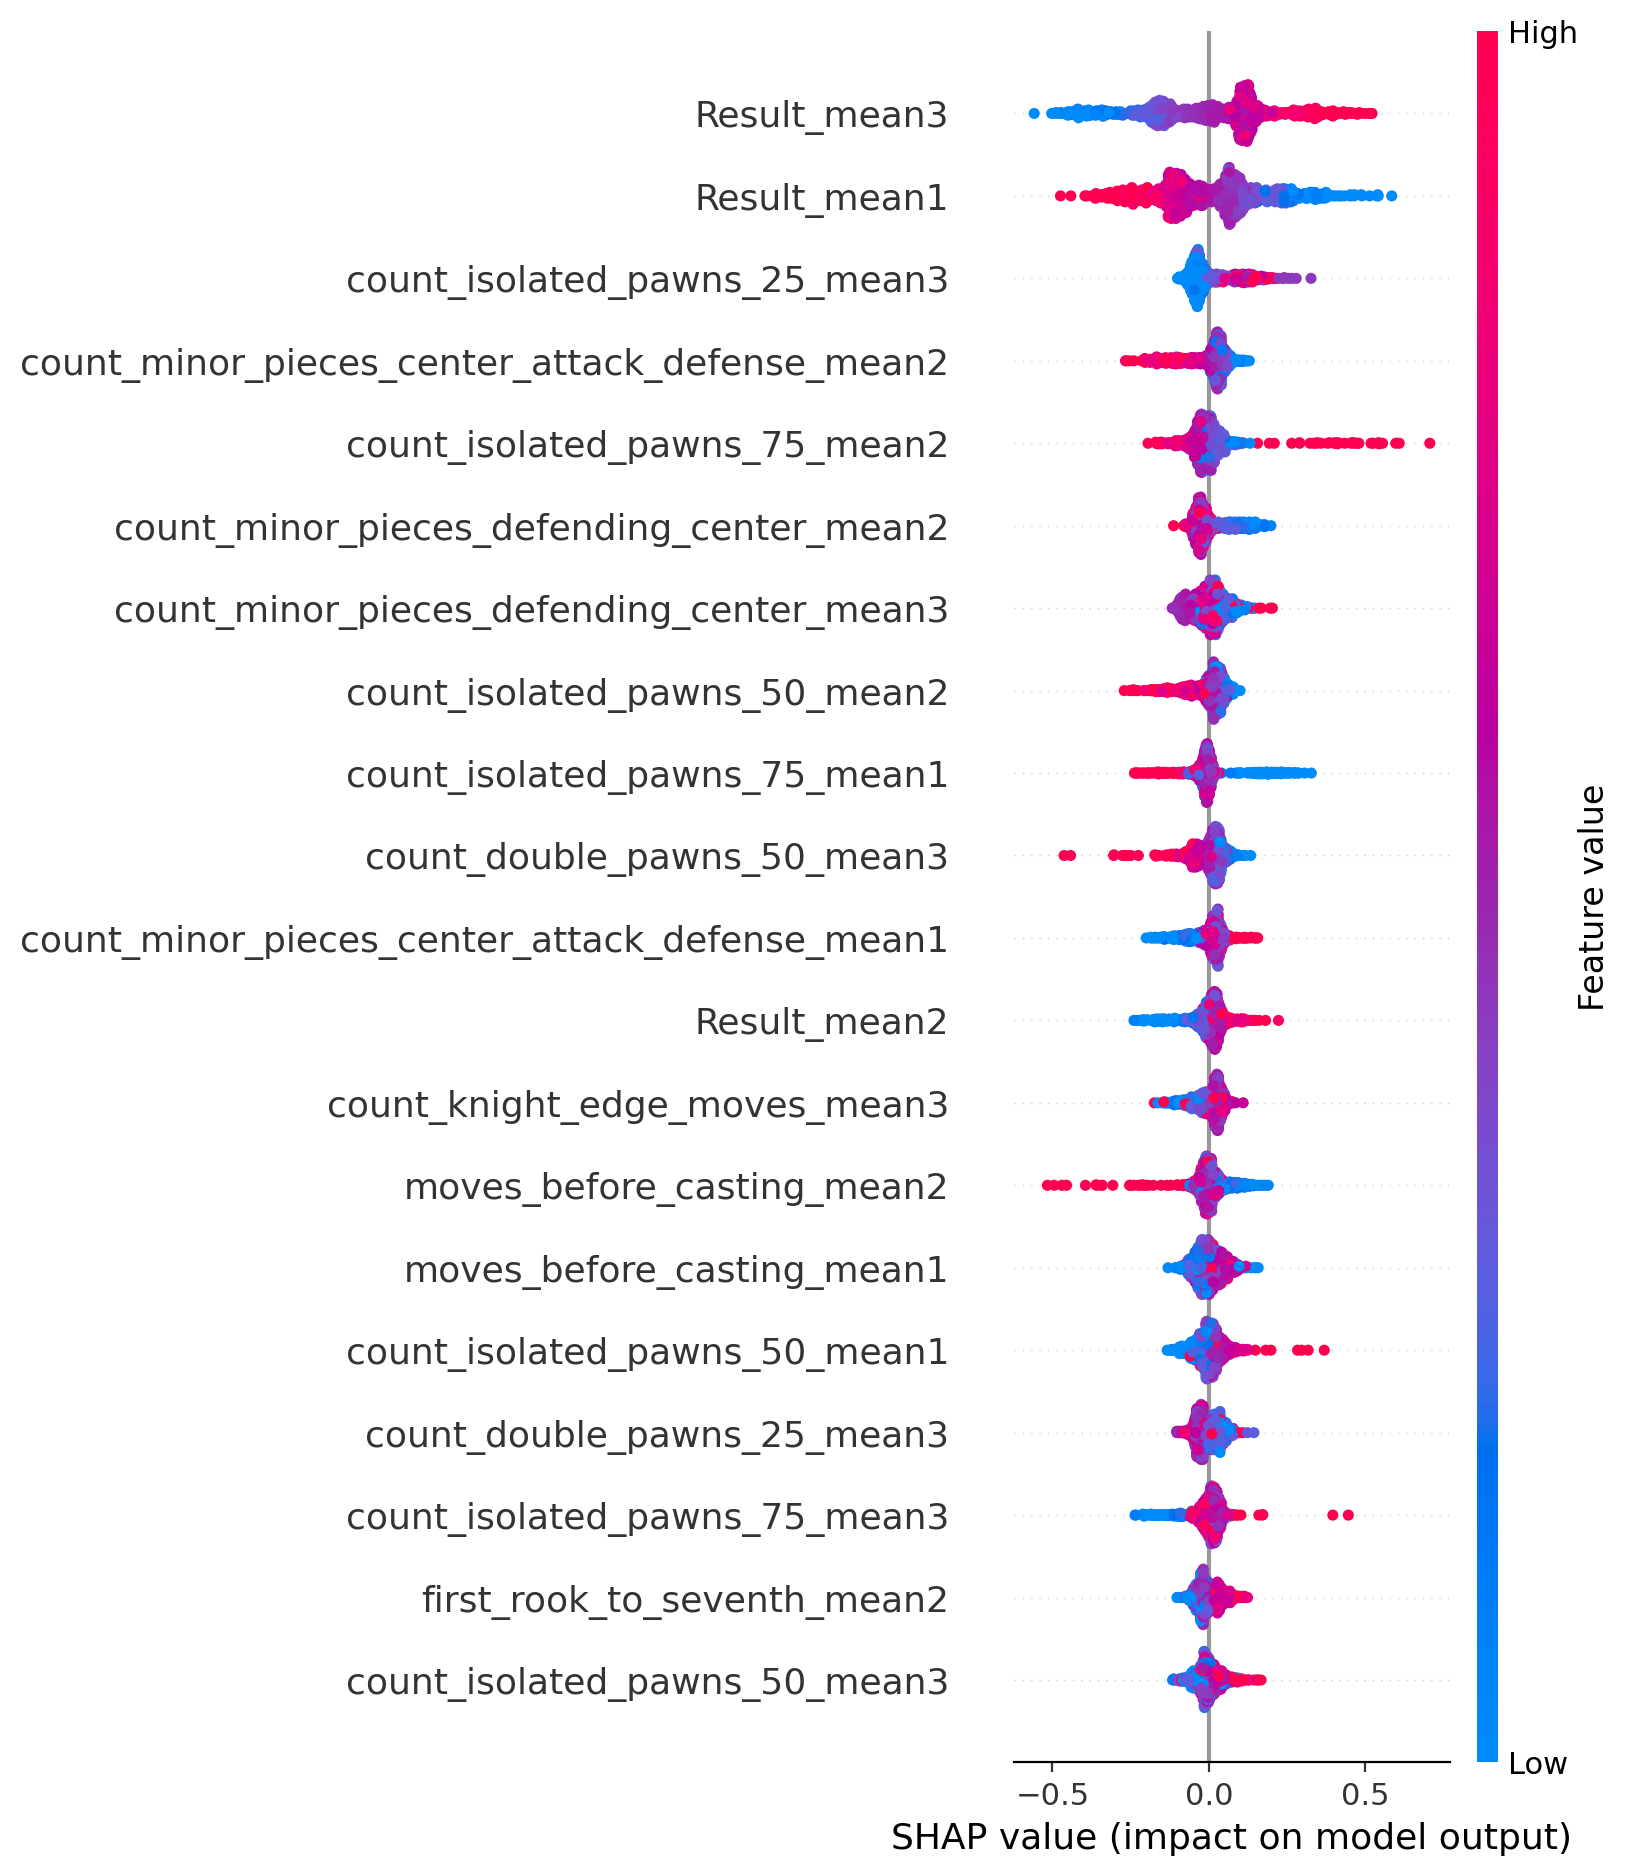

-------------------------------------------------- XGBClassifier --------------------------------------------------
Model name: XGBClassifier
accuracy_score: 0.5208747514910537
roc_auc_score: 0.48033359446402923
precision_score: 0.37681159420289856
f1_score: 0.30144927536231886


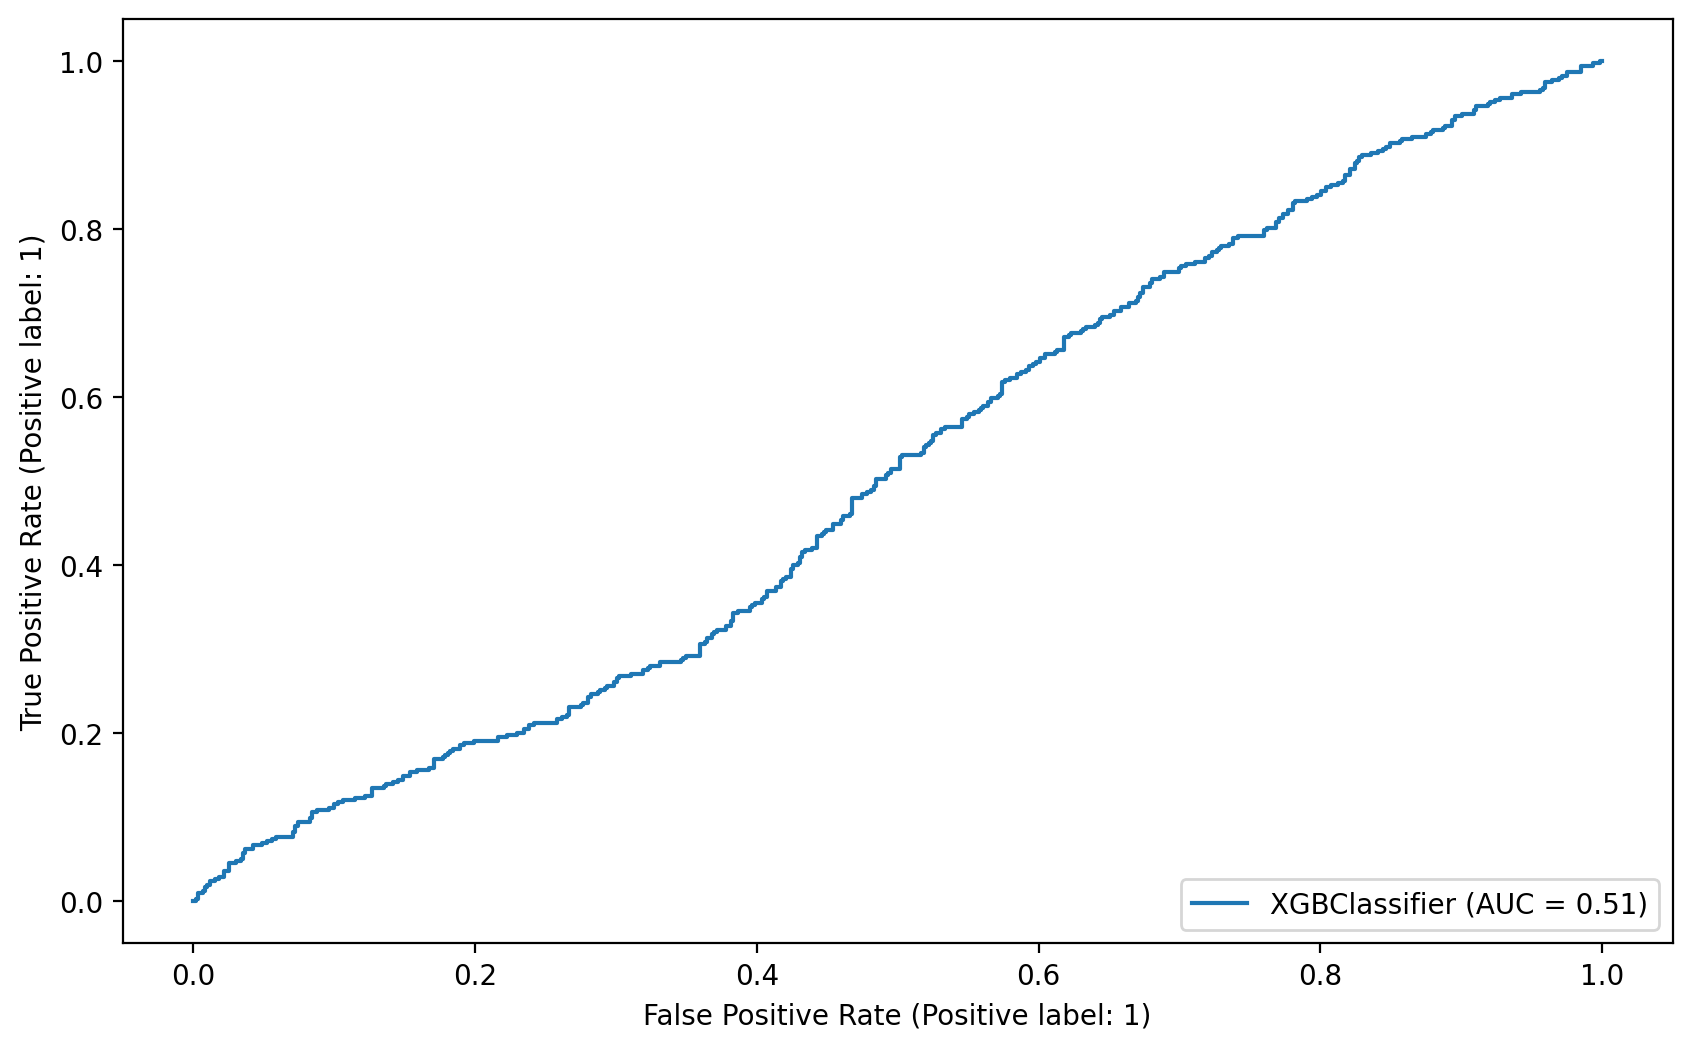

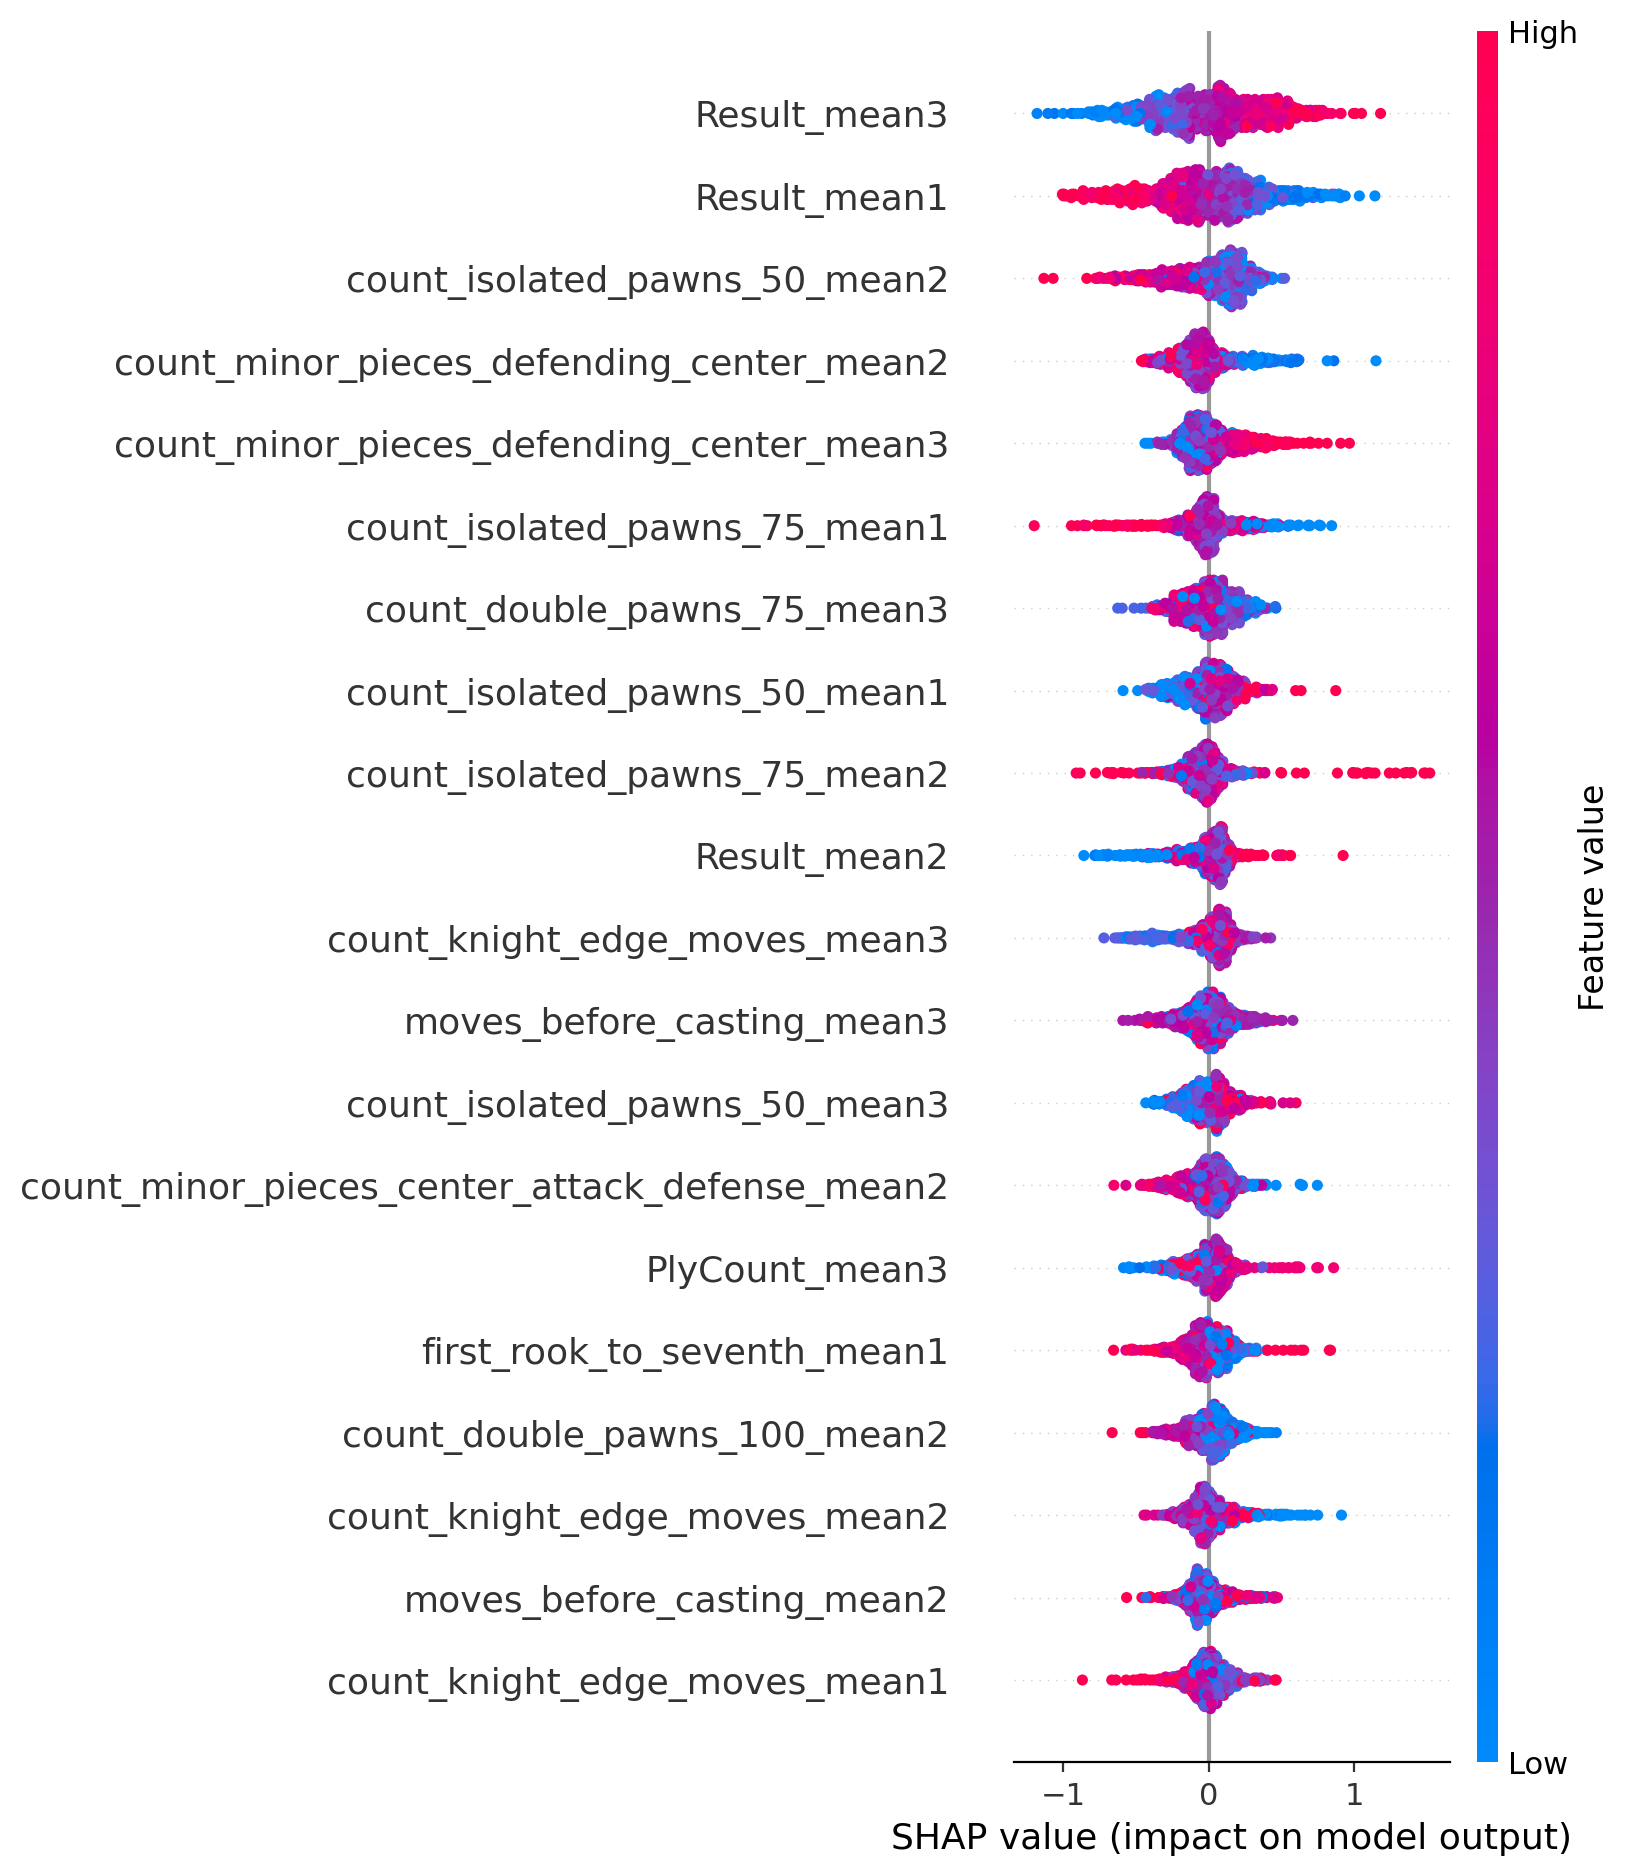

-------------------------------------------------- LGBMClassifier --------------------------------------------------
[LightGBM] [Info] Number of positive: 1583, number of negative: 2441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001481 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12436
[LightGBM] [Info] Number of data points in the train set: 4024, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393390 -> initscore=-0.433086
[LightGBM] [Info] Start training from score -0.433086
Model name: LGBMClassifier
accuracy_score: 0.5556660039761432
roc_auc_score: 0.4976705490848585
precision_score: 0.39705882352941174
f1_score: 0.2660098522167488


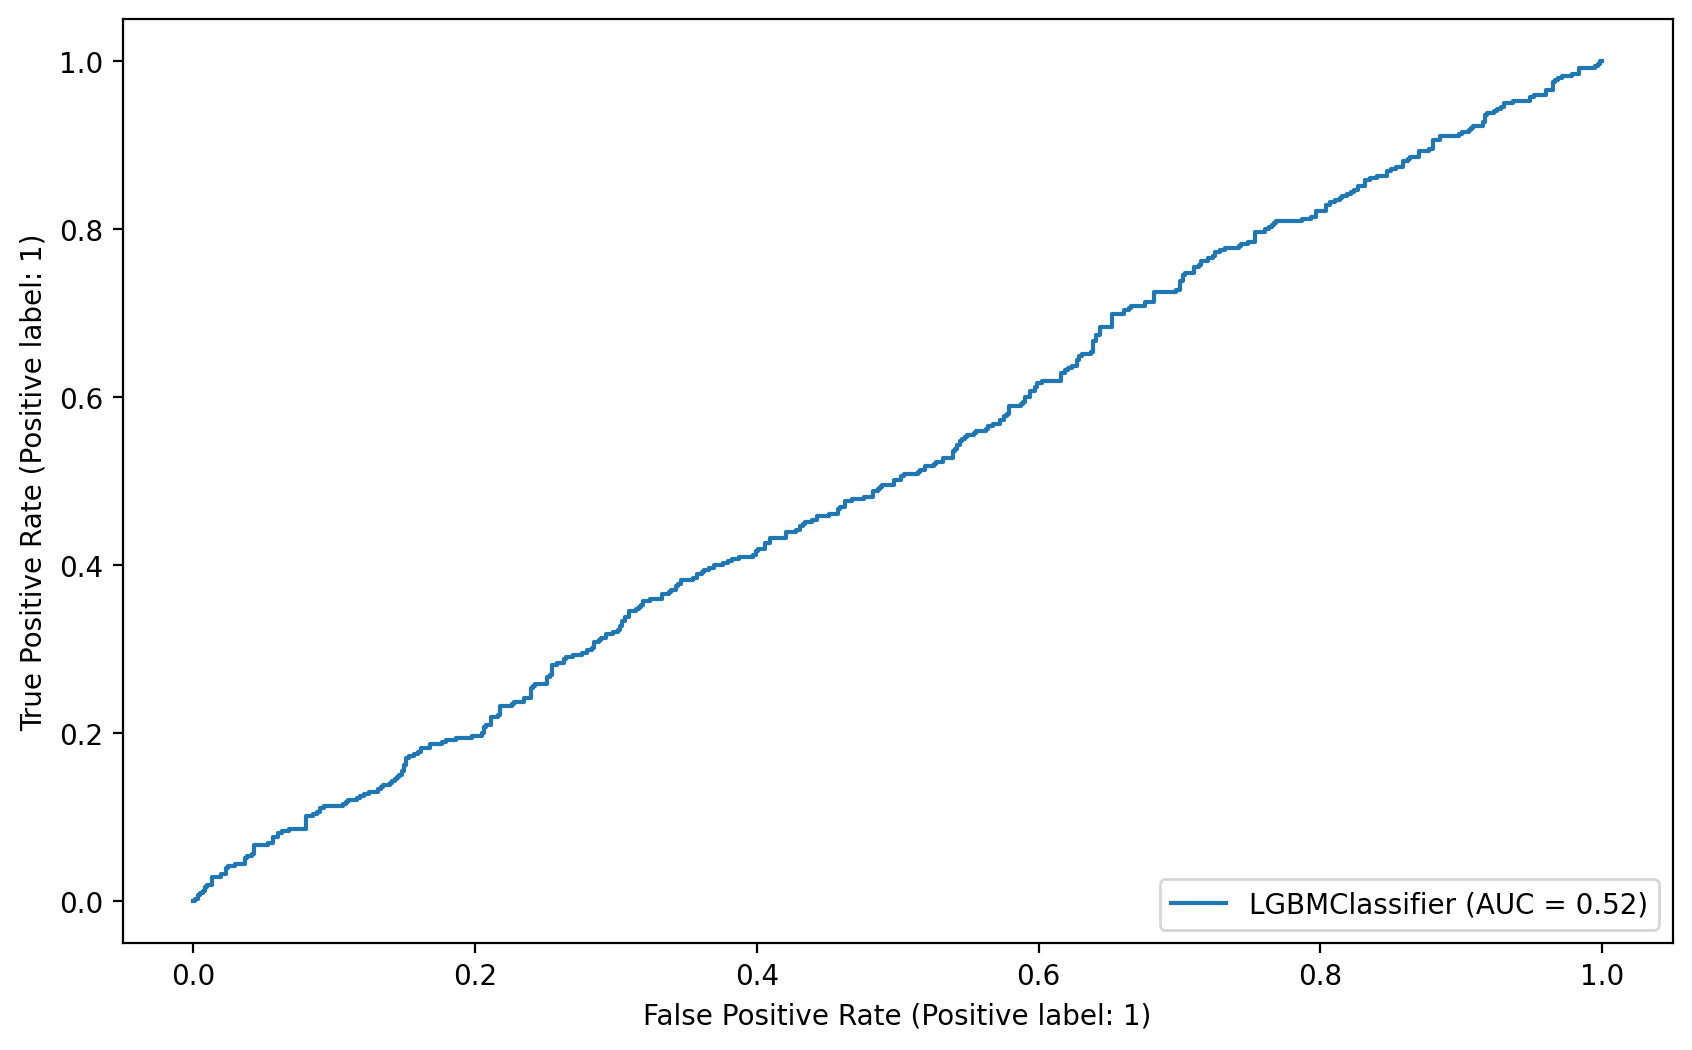

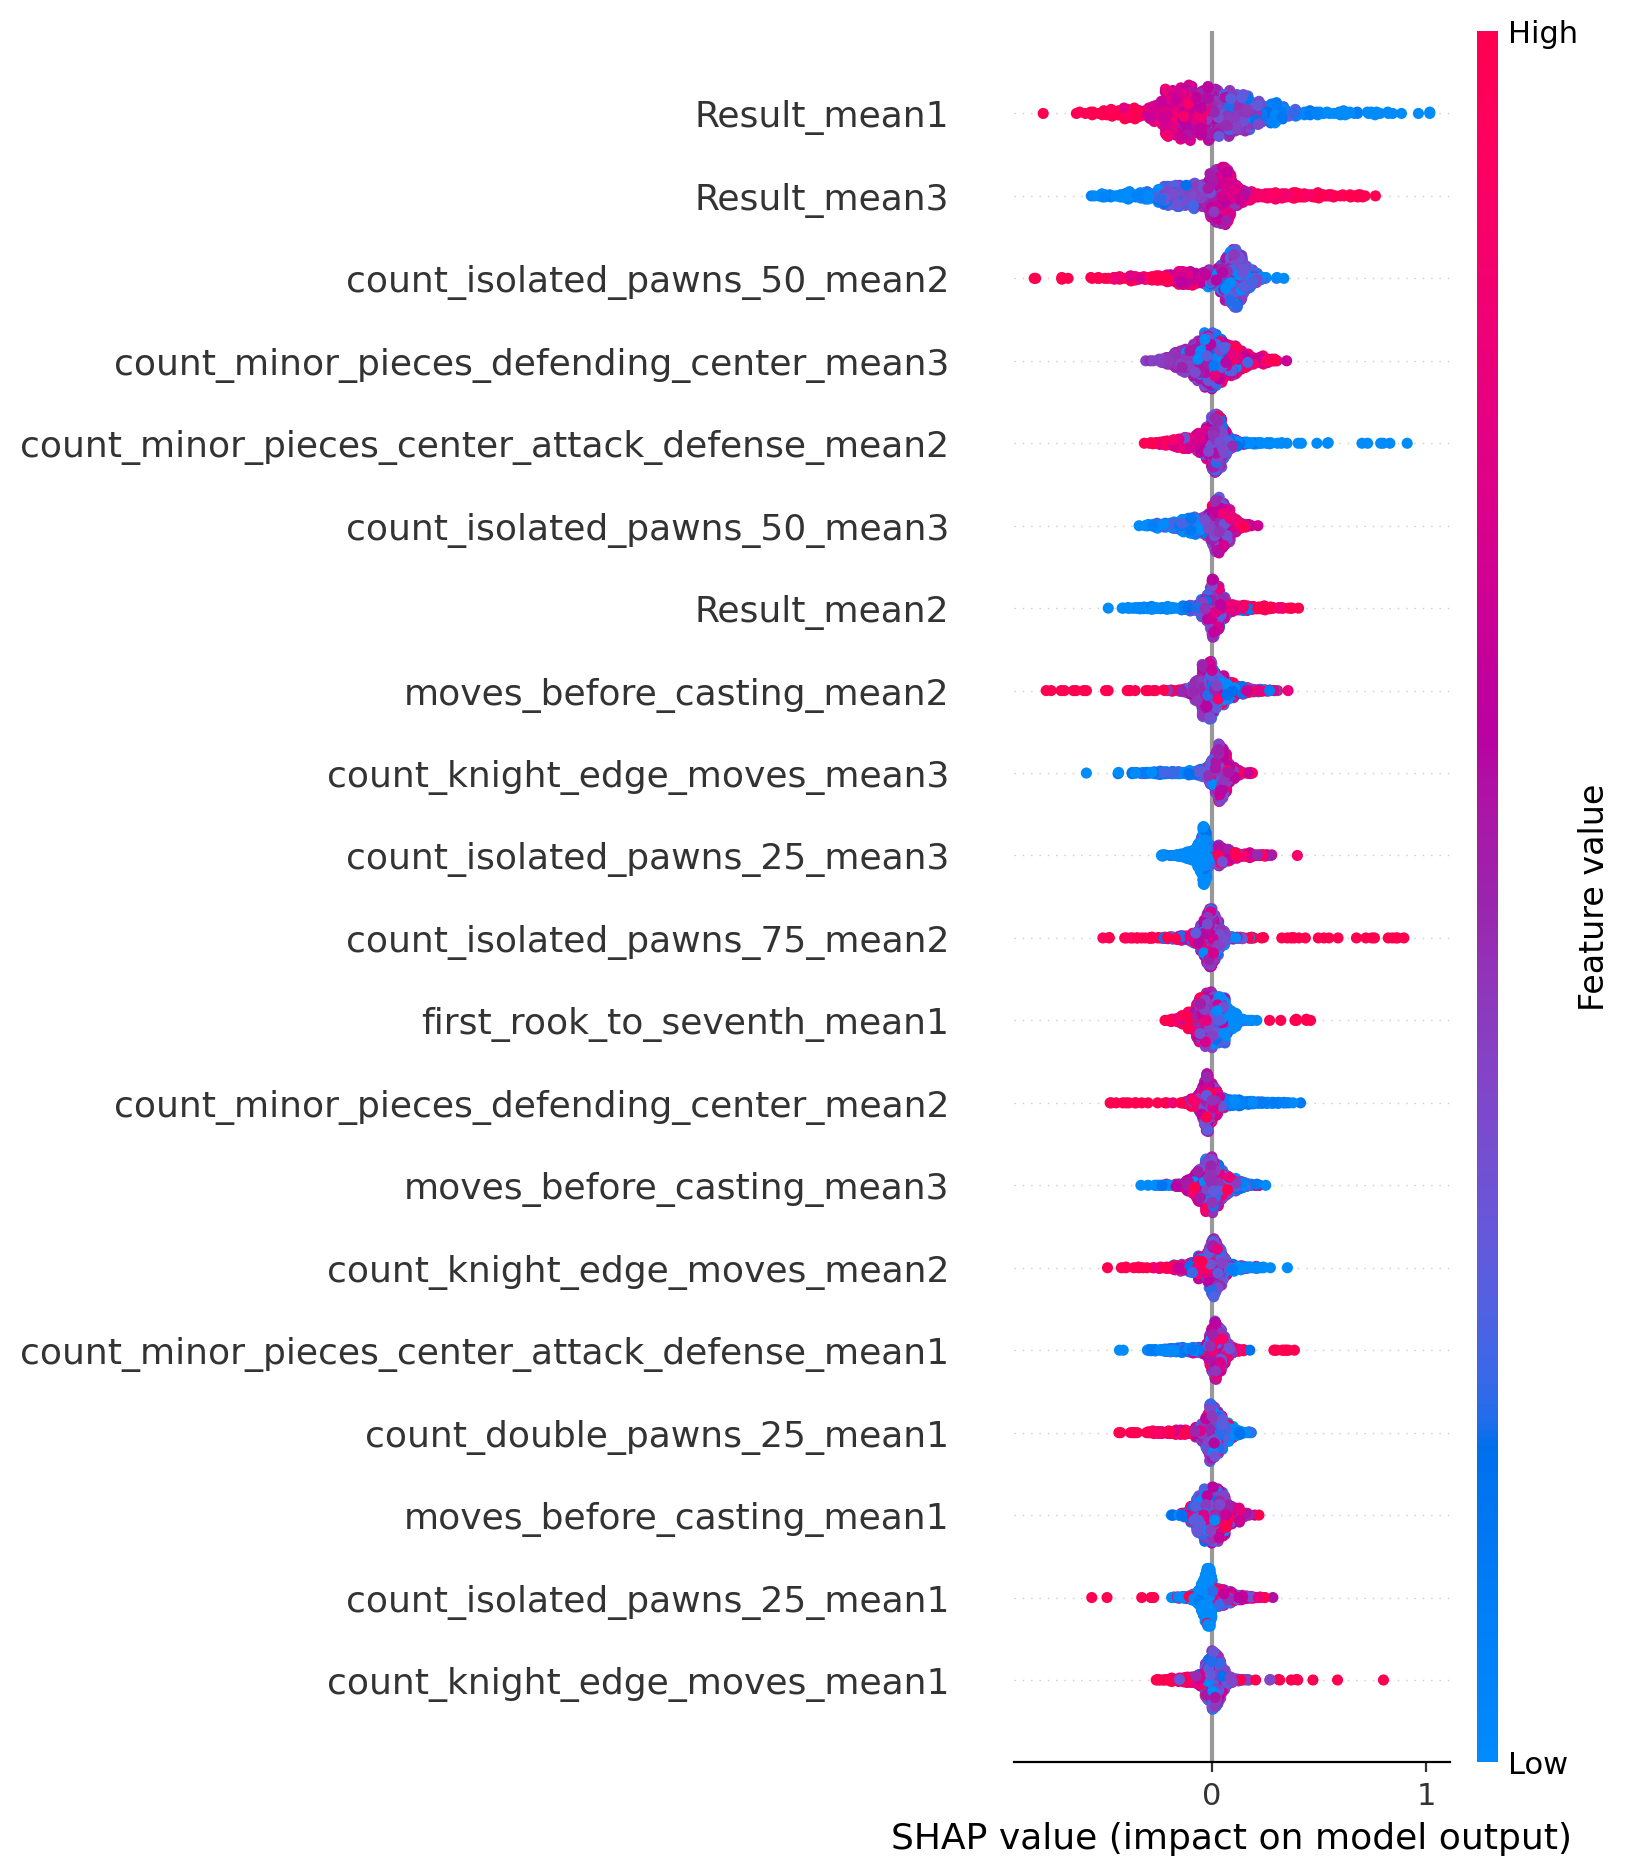

-------------------------------------------------- logistic regression --------------------------------------------------
Model name: logistic regression
accuracy_score: 0.610337972166998
roc_auc_score: 0.5162671832814657
precision_score: 0.6363636363636364
f1_score: 0.09677419354838711


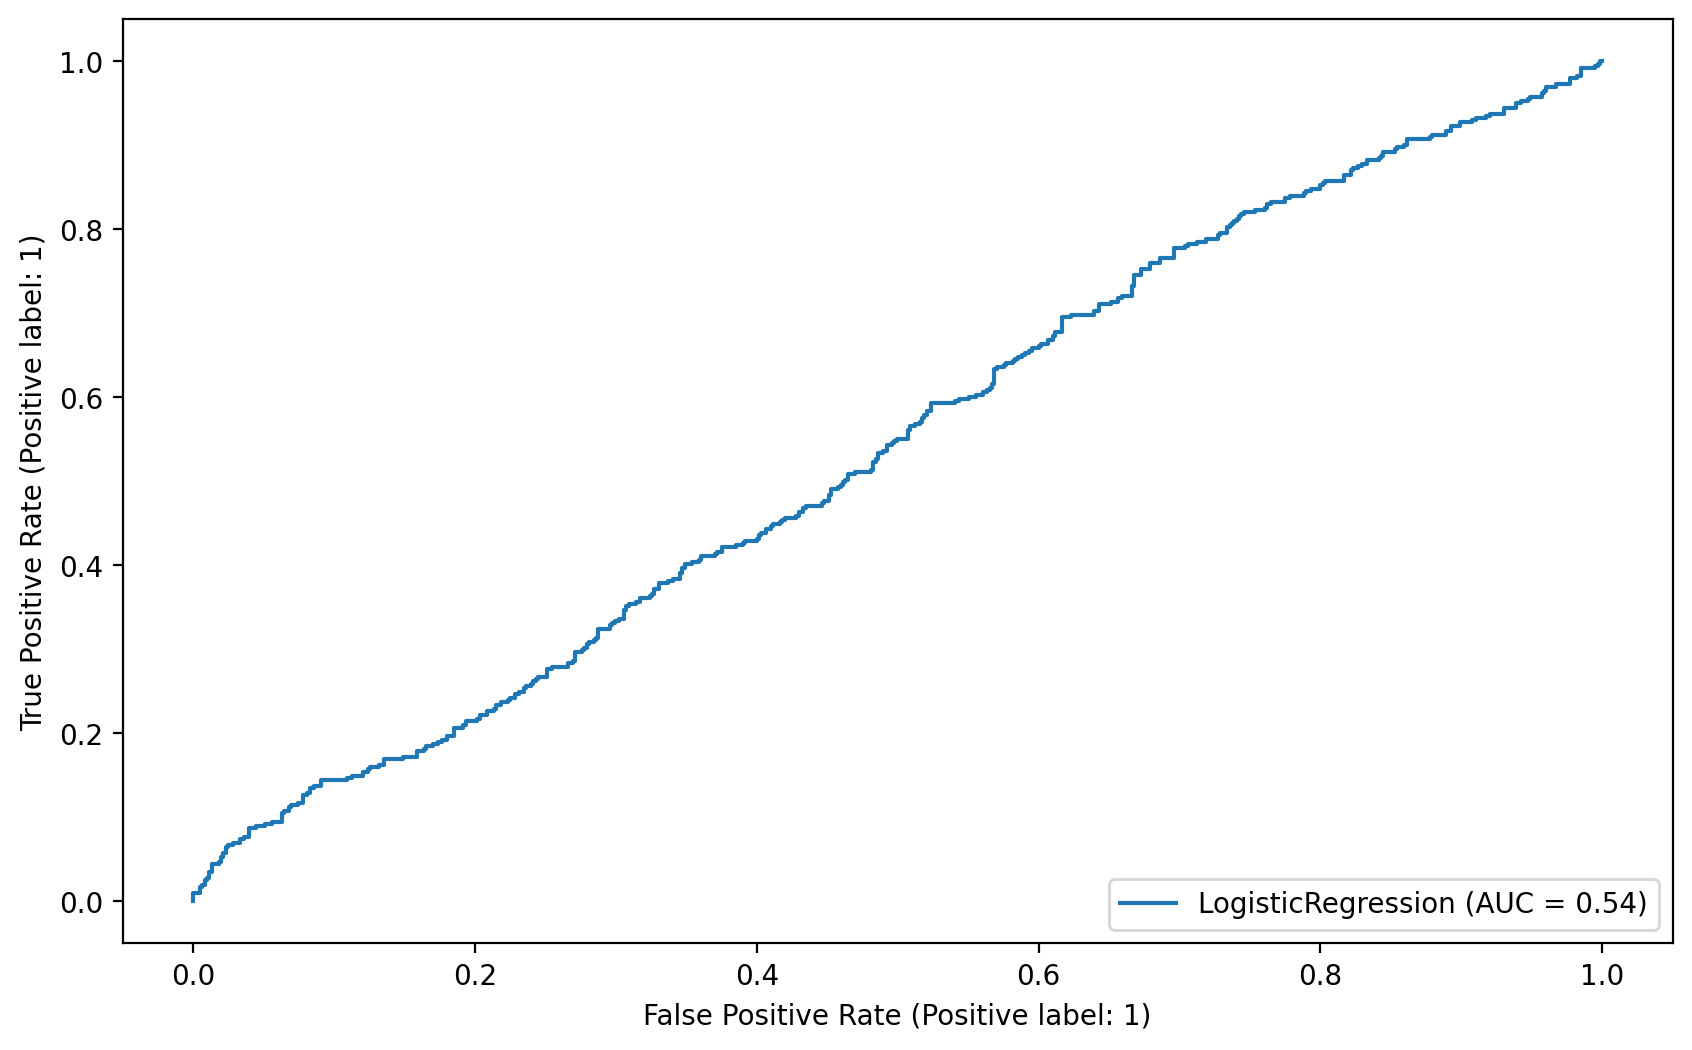

-------------------------------------------------- Support vector machine --------------------------------------------------
Model name: Support vector machine
accuracy_score: 0.6093439363817097
roc_auc_score: 0.5
precision_score: 0.0
f1_score: 0.0


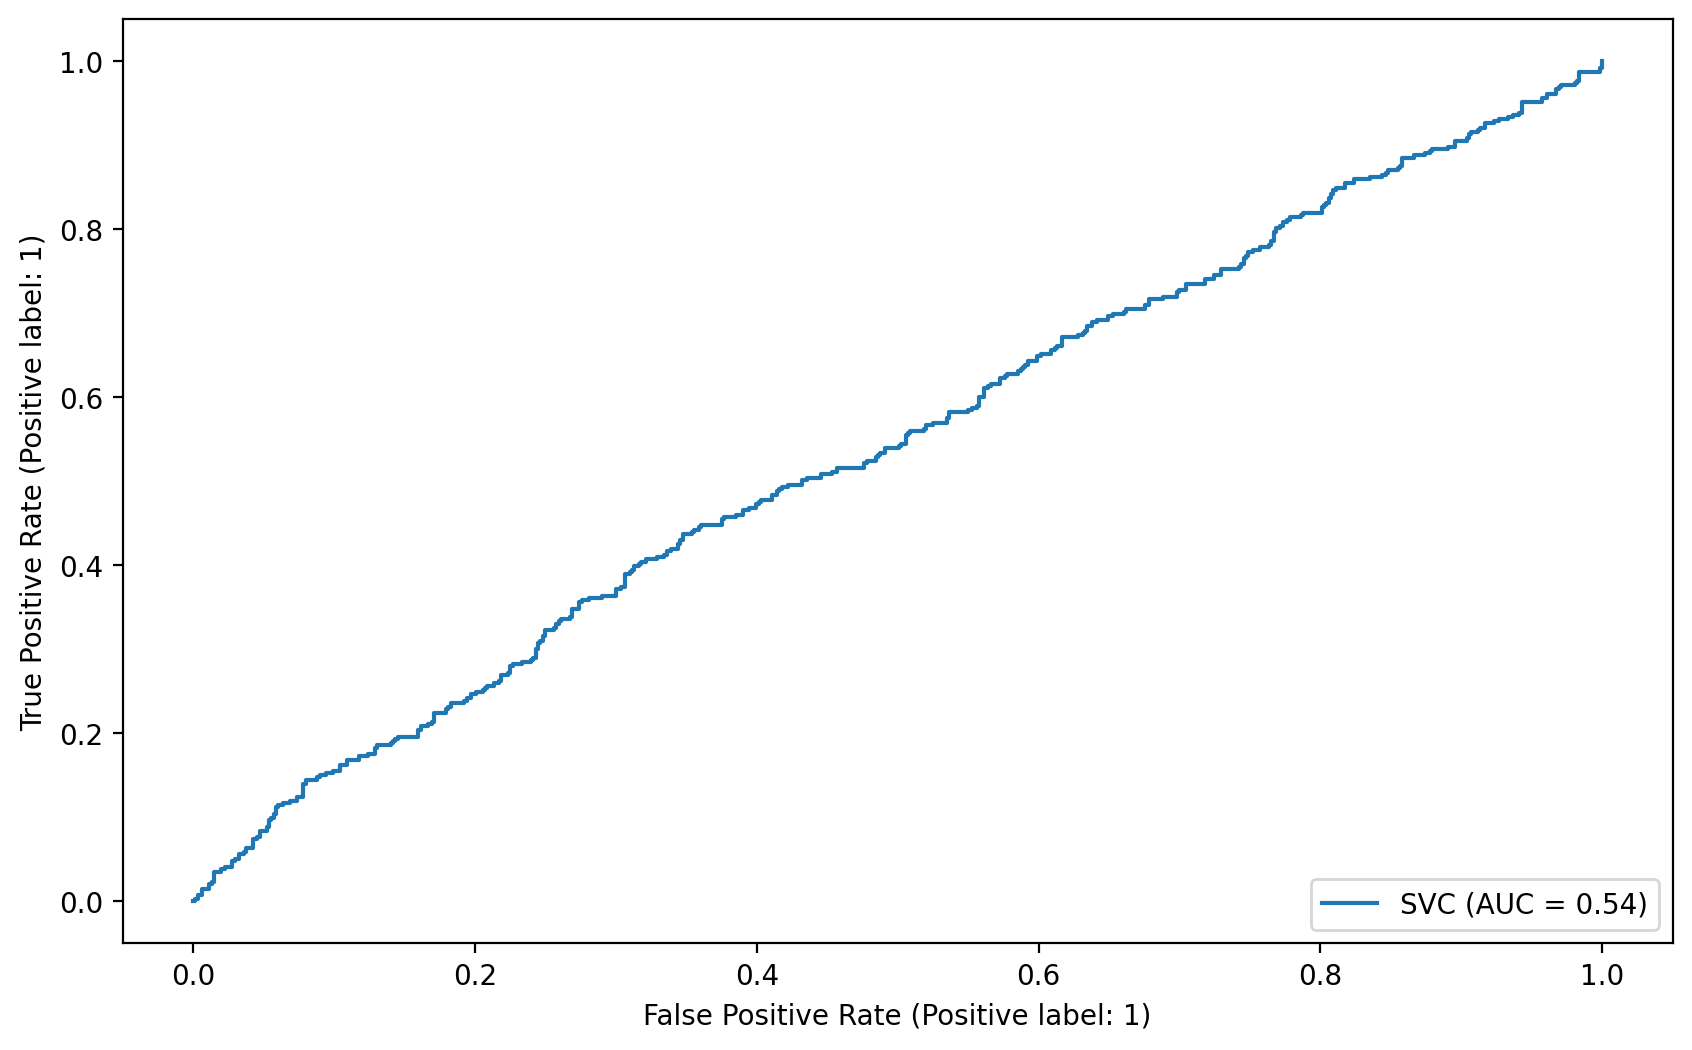

-------------------------------------------------- basic random forrest --------------------------------------------------
Model name: basic random forrest
accuracy_score: 0.6153081510934394
roc_auc_score: 0.5205067658092176
precision_score: 0.4842105263157895
f1_score: 0.19206680584551147


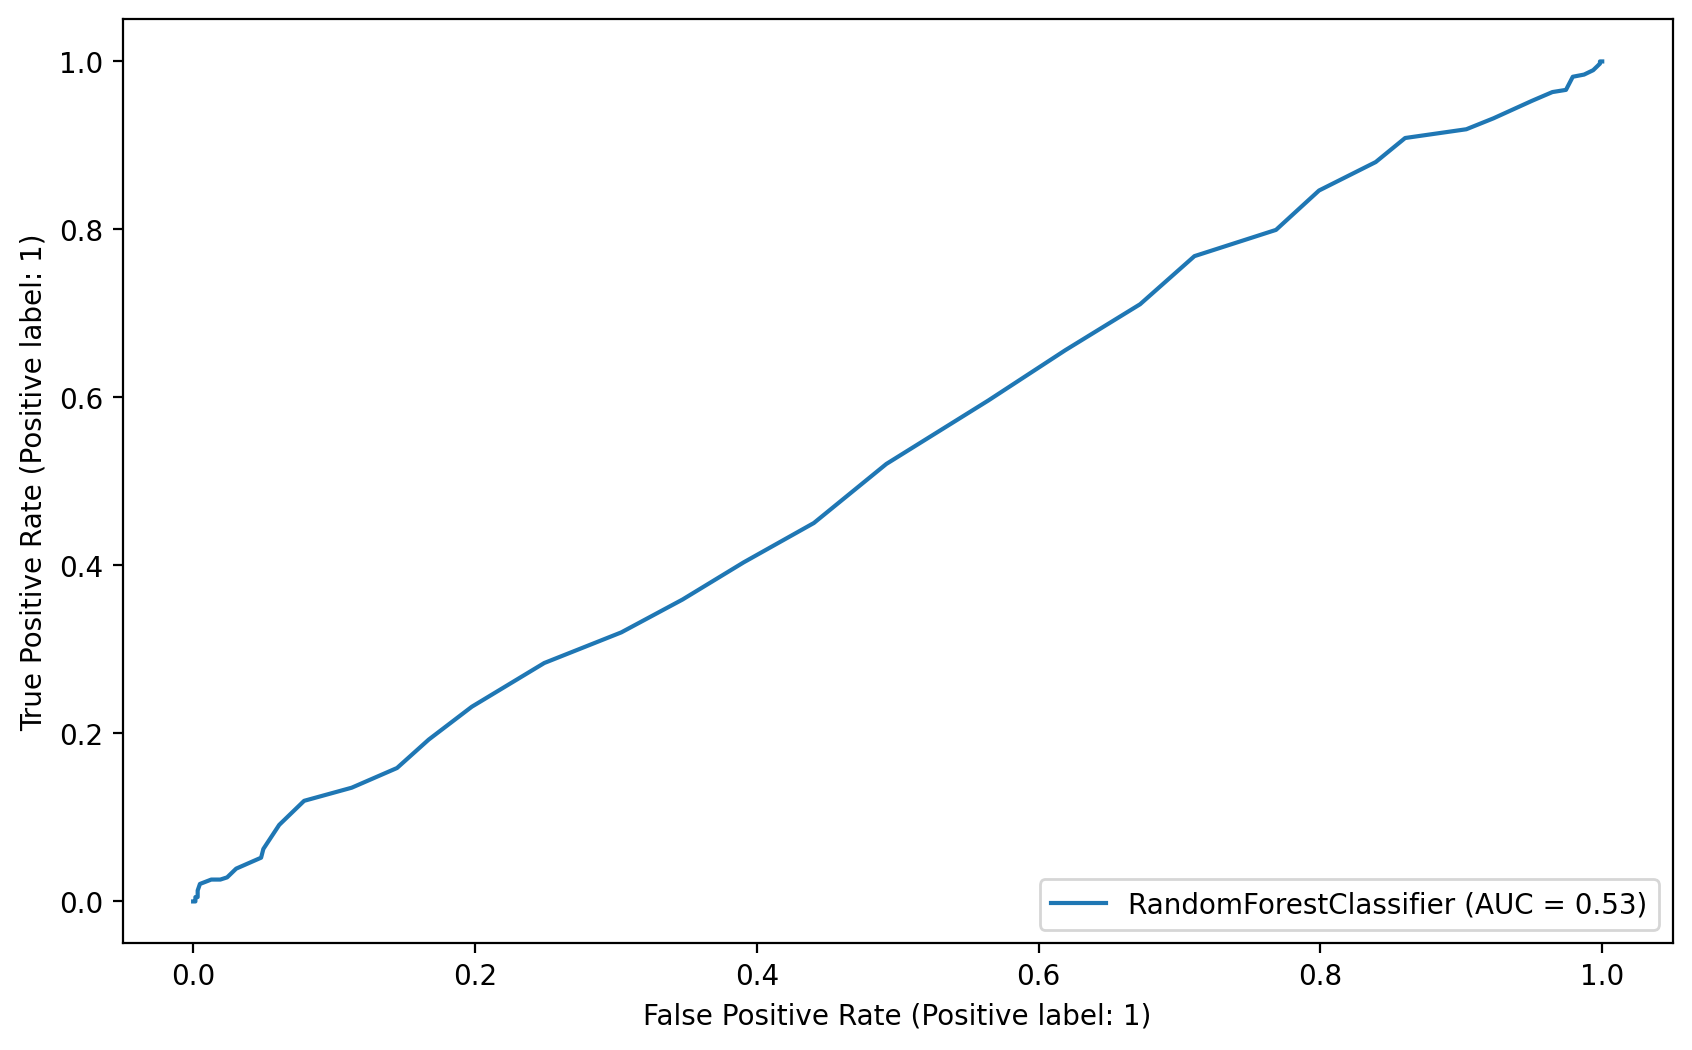

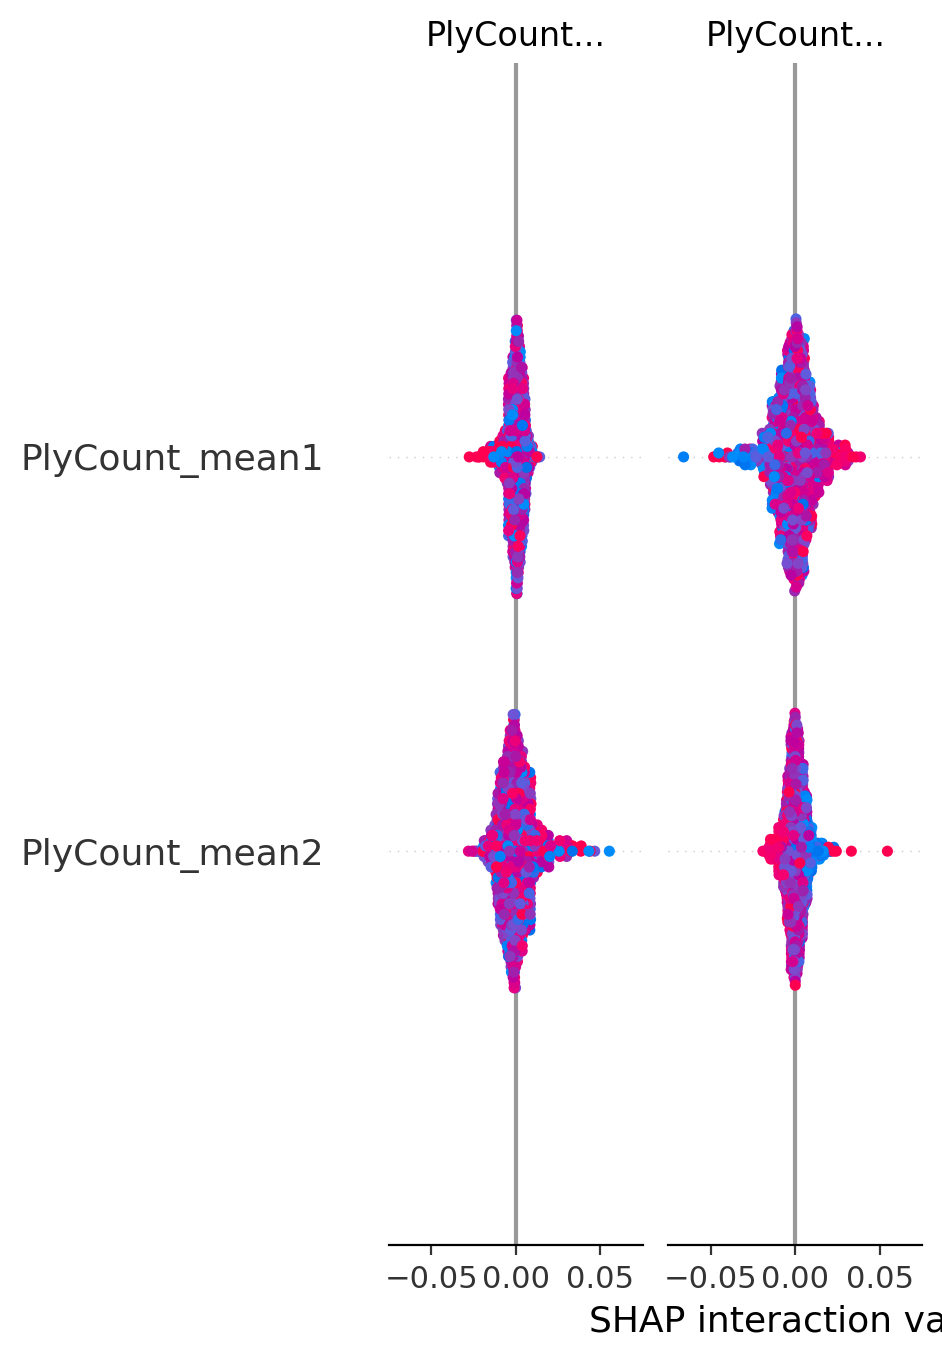

In [108]:
results=[]
for m in get_models():
    print("-"*50,m["name"],"-"*50)
    results.append(classify(players_moves_features_df.drop("Player",axis=1),0.2,m["model"],m["name"]))

In [109]:
compare_model_results(results)

                        Accuracy  Precision  Recall      F1
decision tree             0.5378     0.4075  0.4169  0.4121
Gaussian Naive Bayes      0.5656     0.4291  0.2882  0.3448
XGBClassifier             0.5209     0.3768  0.2512  0.3014
LGBMClassifier            0.5557     0.3971  0.2000  0.2660
AdaBoostClassifier        0.5934     0.4438  0.1816  0.2577
KNeighborsClassifier      0.5875     0.4076  0.1658  0.2357
CatBoostClassifier        0.6034     0.4597  0.1465  0.2222
basic random forrest      0.6153     0.4842  0.1198  0.1921
logistic regression       0.6103     0.6364  0.0524  0.0968
Support vector machine    0.6093     0.0000  0.0000  0.0000


In [110]:

# Select features and target: Assuming the last column is the target
X = players_moves_features_df.drop(columns=["Player","Label"])
y = players_moves_features_df["Label"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, input_dim=X_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')


Epoch 1/150


403/403 [==============================] - 1s 883us/step - loss: 0.8320 - accuracy: 0.5415 - val_loss: 0.7316 - val_accuracy: 0.6143
Epoch 2/150
403/403 [==============================] - 0s 672us/step - loss: 0.7327 - accuracy: 0.5519 - val_loss: 0.6809 - val_accuracy: 0.6292
Epoch 3/150
403/403 [==============================] - 0s 794us/step - loss: 0.7081 - accuracy: 0.5644 - val_loss: 0.6726 - val_accuracy: 0.6272
Epoch 4/150
403/403 [==============================] - 0s 741us/step - loss: 0.7027 - accuracy: 0.5624 - val_loss: 0.6911 - val_accuracy: 0.5726
Epoch 5/150
403/403 [==============================] - 0s 664us/step - loss: 0.6975 - accuracy: 0.5698 - val_loss: 0.6643 - val_accuracy: 0.6362
Epoch 6/150
403/403 [==============================] - 0s 668us/step - loss: 0.6891 - accuracy: 0.5760 - val_loss: 0.6839 - val_accuracy: 0.5924
Epoch 7/150
403/403 [==============================] - 0s 668us/step - loss: 0.6844 - accuracy: 0.5741 - val_loss: 0.6602 - val_accuracy: 0.63